In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from pystlouisfed import FRED

In [11]:
my_key='8c043491aed74a18c010c53625028825'
fred = FRED(api_key=my_key)
# https://fred.stlouisfed.org/series/DGS2

Fixed_30Y_Mtge = fred.series_observations(series_id="MORTGAGE30US").resample('M').last()
Fed_Funds = fred.series_observations(series_id="FEDFUNDS").resample('M').last()
CPI = fred.series_observations(series_id="CPIAUCSL").resample('M').last()
Unemployment = fred.series_observations(series_id="UNRATE").resample('M').last()
Nonfarm_Job_Opening = fred.series_observations(series_id="JTSJOL").resample('M').last()
Diff_10Y_3M = fred.series_observations(series_id="T10Y3M").resample('M').last()
Diff_10Y_2Y = fred.series_observations(series_id="T10Y2Y").resample('M').last()
Breakeven_10Y_Inflation = fred.series_observations(series_id="T10YIE").resample('M').last()
HY_OAS = fred.series_observations(series_id="BAMLH0A0HYM2").resample('M').last()
Credit_Card_Deliq = fred.series_observations(series_id="DRCCLACBS").resample('M').last()
Home_Price = fred.series_observations(series_id="CSUSHPINSA").resample('M').last()
Median_House_Price = fred.series_observations(series_id="MSPUS").resample('M').last()
Yield_2Y = fred.series_observations(series_id="DGS2").resample('M').last()
Yield_10Y = fred.series_observations(series_id="DFII10").resample('M').last()
Yield_30Y = fred.series_observations(series_id="DGS30").resample('M').last()
PPI = fred.series_observations(series_id="PCUOMFGOMFG").resample('M').last()
AAA_Corp_Yield = fred.series_observations(series_id="WAAA").resample('M').last()

In [12]:
dataset = pd.read_csv('kc_house_data.csv')
dataset.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [13]:
dataset.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [14]:
Y = dataset[['price']]
X = dataset.drop(['price', 'id', 'date'],  axis=1)
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   bedrooms       21613 non-null  int64  
 1   bathrooms      21613 non-null  float64
 2   sqft_living    21613 non-null  int64  
 3   sqft_lot       21613 non-null  int64  
 4   floors         21613 non-null  float64
 5   waterfront     21613 non-null  int64  
 6   view           21613 non-null  int64  
 7   condition      21613 non-null  int64  
 8   grade          21613 non-null  int64  
 9   sqft_above     21613 non-null  int64  
 10  sqft_basement  21613 non-null  int64  
 11  yr_built       21613 non-null  int64  
 12  yr_renovated   21613 non-null  int64  
 13  zipcode        21613 non-null  int64  
 14  lat            21613 non-null  float64
 15  long           21613 non-null  float64
 16  sqft_living15  21613 non-null  int64  
 17  sqft_lot15     21613 non-null  int64  
dtypes: flo

In [15]:
column = X.columns
column

Index(['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [16]:
dataset_corr = dataset.drop(['id', 'date'], axis=1)
dataset_corr.corr(method='pearson')

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
price,1.000000,0.308350,0.525138,0.702035,0.089661,0.256794,0.266369,0.397293,0.036362,0.667434,0.605567,0.323816,0.054012,0.126434,-0.053203,0.307003,0.021626,0.585379,0.082447
bedrooms,0.308350,1.000000,0.515884,0.576671,0.031703,0.175429,-0.006582,0.079532,0.028472,0.356967,0.477600,0.303093,0.154178,0.018841,-0.152668,-0.008931,0.129473,0.391638,0.029244
bathrooms,0.525138,0.515884,1.000000,0.754665,0.087740,0.500653,0.063744,0.187737,-0.124982,0.664983,0.685342,0.283770,0.506019,0.050739,-0.203866,0.024573,0.223042,0.568634,0.087175
sqft_living,0.702035,0.576671,0.754665,1.000000,0.172826,0.353949,0.103818,0.284611,-0.058753,0.762704,0.876597,0.435043,0.318049,0.055363,-0.199430,0.052529,0.240223,0.756420,0.183286
sqft_lot,0.089661,0.031703,0.087740,0.172826,1.000000,-0.005201,0.021604,0.074710,-0.008958,0.113621,0.183512,0.015286,0.053080,0.007644,-0.129574,-0.085683,0.229521,0.144608,0.718557
floors,0.256794,0.175429,0.500653,0.353949,-0.005201,1.000000,0.023698,0.029444,-0.263768,0.458183,0.523885,-0.245705,0.489319,0.006338,-0.059121,0.049614,0.125419,0.279885,-0.011269
waterfront,0.266369,-0.006582,0.063744,0.103818,0.021604,0.023698,1.000000,0.401857,0.016653,0.082775,0.072075,0.080588,-0.026161,0.092885,0.030285,-0.014274,-0.041910,0.086463,0.030703
view,0.397293,0.079532,0.187737,0.284611,0.074710,0.029444,0.401857,1.000000,0.045990,0.251321,0.167649,0.276947,-0.053440,0.103917,0.084827,0.006157,-0.078400,0.280439,0.072575
condition,0.036362,0.028472,-0.124982,-0.058753,-0.008958,-0.263768,0.016653,0.045990,1.000000,-0.144674,-0.158214,0.174105,-0.361417,-0.060618,0.003026,-0.014941,-0.106500,-0.092824,-0.003406
grade,0.667434,0.356967,0.664983,0.762704,0.113621,0.458183,0.082775,0.251321,-0.144674,1.000000,0.755923,0.168392,0.446963,0.014414,-0.184862,0.114084,0.198372,0.713202,0.119248


<AxesSubplot:>

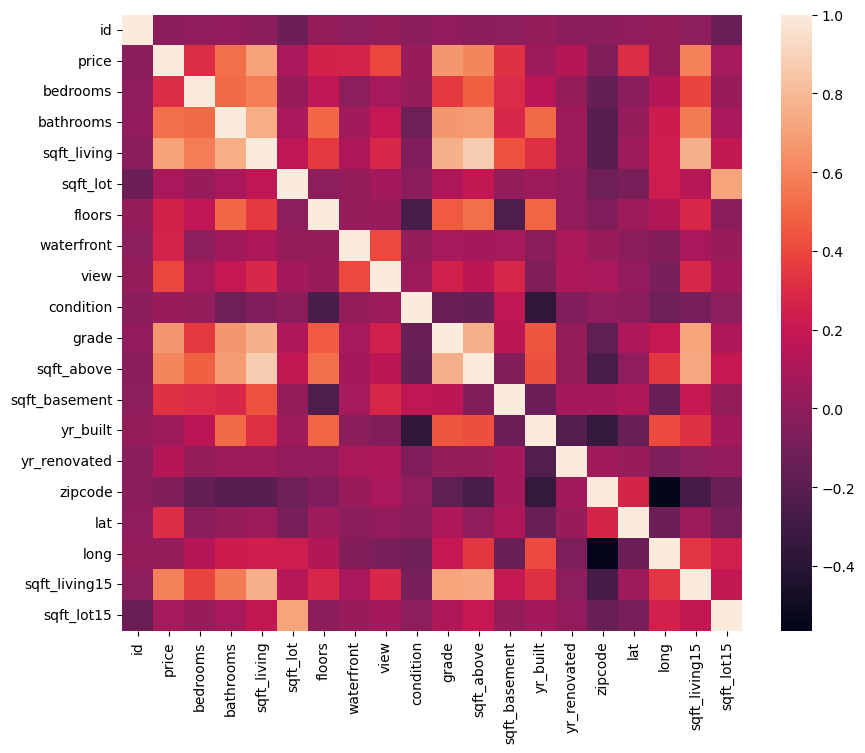

In [17]:
plt.subplots(figsize=(10,8))
sns.heatmap(dataset.corr())

### statsmodels.OLS on full data

In [18]:
import statsmodels.api as sm
from statsmodels import tools
X_new = tools.add_constant(X)
regressor_OLS = sm.OLS(endog=Y,exog=X_new).fit()
# regressor_OLS.summary()
regressor_OLS.params
# regressor_OLS.tvalues
# regressor_OLS.rsquared
# regressor_OLS.bse # standard error
# regressor_OLS.predict() # predicted values
# https://www.geeksforgeeks.org/interpreting-the-results-of-linear-regression-using-ols-summary/

const            6.690325e+06
bedrooms        -3.576654e+04
bathrooms        4.114428e+04
sqft_living      1.104421e+02
sqft_lot         1.285979e-01
floors           6.689550e+03
waterfront       5.829605e+05
view             5.287094e+04
condition        2.638565e+04
grade            9.589045e+04
sqft_above       7.078599e+01
sqft_basement    3.965840e+01
yr_built        -2.620223e+03
yr_renovated     1.981258e+01
zipcode         -5.824199e+02
lat              6.027482e+05
long            -2.147298e+05
sqft_living15    2.168140e+01
sqft_lot15      -3.826418e-01
dtype: float64

### Simple linear model - statsmodel.OLS

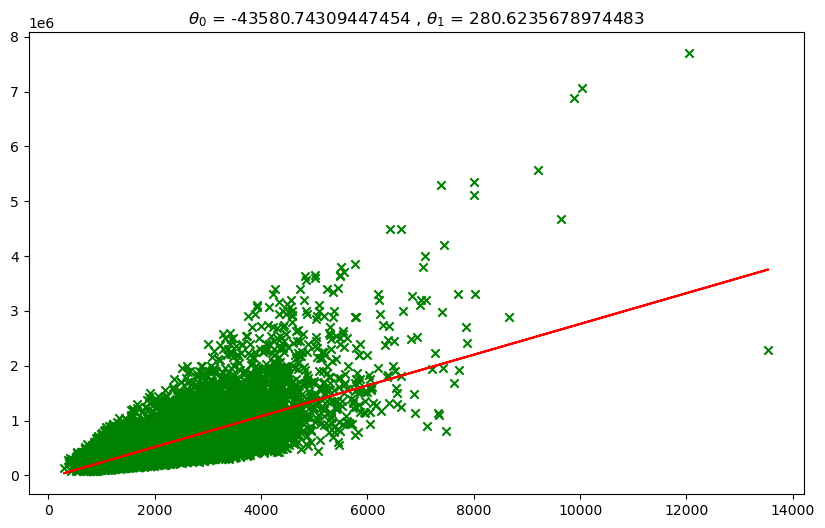

In [19]:
x = X[['sqft_living']]
y = Y
xsm = x.values.reshape(-1,1) # or: np.array(x)
#When you use reshape(-1, 1), you are asking numpy to reshape your array with 1 column and as many rows as necessary
#to accommodate the data. This operation will result in a 2D array with a shape (n, 1), where n is the number of 
#elements in your original array.
ysm = y.values.reshape(-1,1)
xsm = np.concatenate((np.ones(len(x)).reshape(-1,1), xsm), axis=1)
# or: X_new = tools.add_constant(X)
results = sm.OLS(ysm, xsm).fit()
# results.summary()
# results.rsquared
# plotting the original values vs fitted values
thetas = results.params
plt.figure(figsize=(10,6))
plt.title('$\\theta_0$ = {} , $\\theta_1$ = {}'.format(thetas[0], thetas[1]))
plt.scatter(xsm[:,1],ysm, marker='x', color='g') # original
plt.plot(xsm[:,1], np.dot(xsm, thetas), 'r') # fitted

### Simple linear model - sklearn.linear_model

In [21]:
from sklearn.linear_model import LinearRegression
xsl = x.values.reshape(-1,1) 
ysl = y.values.reshape(-1,1)
xsl = np.concatenate((np.ones(len(xsl)).reshape(-1,1), xsl), axis=1)

slr = LinearRegression()
slr.fit(xsl[:,1].reshape(-1,1), ysl.reshape(-1,1)) 
# only take the sqrt column to fit (no constant) because fit_interceptbool, default=True
y_hat = slr.predict(xsl[:,1].reshape(-1,1))

print('theta[0] = ', slr.intercept_)
print('theta[1] = ', slr.coef_)

#thetas = np.array((slr.intercept_, slr.coef_)).squeeze() #transfored into array

theta[0] =  [-43580.74309448]
theta[1] =  [[280.6235679]]


### Simple linear model - scipy stats

In [22]:
from scipy import stats
xs = x.iloc[:,0]
ys = y.iloc[:,0]
slope, intercept, r_value, p_value, std_err = stats.linregress(xs, ys) # result is a LinregressResult instance
print('Slope = {} and Intercept = {}'.format(slope, intercept))
print('y = x({}) + {}'.format(slope, intercept))

Slope = 280.62356789744837 and Intercept = -43580.743094474194
y = x(280.62356789744837) + -43580.743094474194


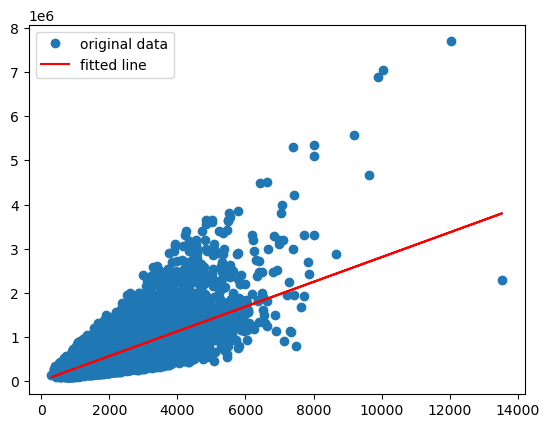

In [23]:
res_s = stats.linregress(xs, ys)
plt.plot(xs, ys, 'o', label='original data')
plt.plot(xs, np.dot(xs, slope), 'r', label='fitted line')
# or: plt.plot(xs, res_s.intercept + res_s.slope*xs, 'r', label='fitted line')
plt.legend()
plt.show()

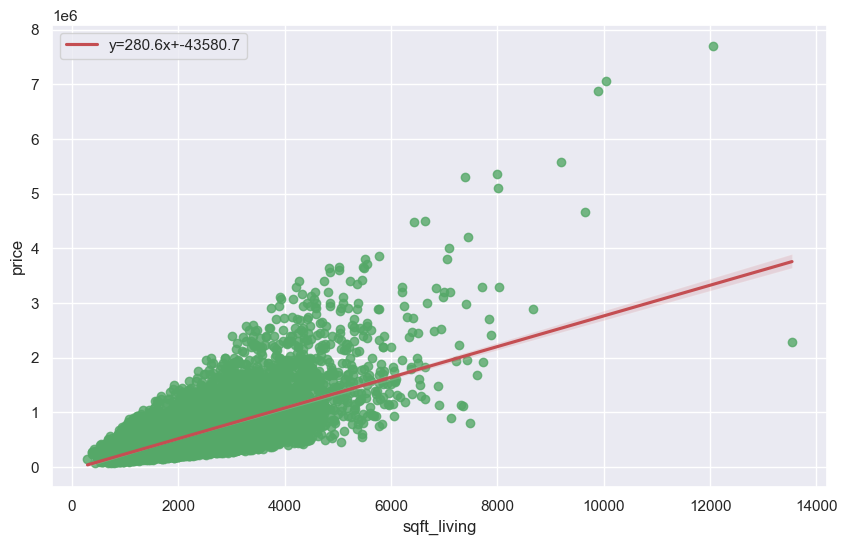

In [24]:
# Using seaborn.regplot() and scipy.stats
sns.set(color_codes=True)
f = plt.figure(figsize=(10,6))
data = dataset[['price','sqft_living']]
ax = sns.regplot(x='sqft_living', y='price', data=data, 
                 scatter_kws={"color": "g"}, 
                line_kws={'color': 'r', 'label':"y={0:.1f}x+{1:.1f}".format(slope,intercept)})
# simple version of regplot: ax = sns.regplot(x='sqft_living', y='price', data=data)
ax.legend()

### Simple linear model - Manual Method: Compute Slope and Intercept using a Formula 

In [25]:
def simple_linear_regression(X, Y):
    mean_x = X.mean()
    mean_y = Y.mean()

    delta_x = X - mean_x
    delta_y = Y - mean_y

    slope = (delta_x * delta_y).sum()/(delta_x**2).sum()
    intercept = mean_y - slope*mean_x
    
    return (slope, intercept)

xf = x.values.reshape(-1,1)
yf = y.values.reshape(-1,1)

slope, intercept = simple_linear_regression(xf, yf)
print('Slope = {} and Intercept = {}'.format(slope, intercept))
print('y = x({}) + {}'.format(slope, intercept))

Slope = 280.6235678974483 and Intercept = -43580.74309447408
y = x(280.6235678974483) + -43580.74309447408


### Simple linear model - Manual Method: Gradient Descent

To make the best line to model the data, we want to pick parameters $\beta$ that allows our predicted value to be as close to the actual value as possible. In other words, we want the distance or residual between our hypothesis $h(x)$ and y to be minimized.

So we formally define a cost function using ordinary least squares that is simply the sum of the squared distances. To find the liner regression line, we minimize:
$$J(\beta) = \frac{1}{2m}\sum_{i=1}^m(h_\beta(x^{(i)})-y^{(i)})^2$$

Again the hypothesis that we're trying to find is given by the linear model:
$$h_\beta(x) = \beta^{T}x = \beta_0 + \beta_1x_1$$

The parameters of the model are the beta values. We adjust $\beta_j$ to minimze the cost function $J(\beta)$. 

And we can use batch gradient descent where each iteration performs the update
$$\beta_j := \beta_j - \alpha\frac{1}{m}\sum_{i=1}^m (h_\beta(x^{(i)})-y^{(i)})x_{j}^{(i)}$$

Whoa, what's gradient descent? And why are we updating that?

Gradient descent simply is an algorithm that makes small steps along a function to find a local minimum. 

Indeed, we keep updating our parameter beta to get us closer and closer to the minumum.
$$\beta_j := \beta_j - \alpha\frac{\partial}{\partial \beta_j} J(\beta)$$
Where $\alpha$ is our learning rate and $J(\beta)$ is our cost function. By adjusting alpha, we can change how quickly we converge on the minimum (at the risk of overshooting it entirely and does not converge on our local minimum)

In the following python implementation: Alpha is my learning rate, and iterations defines how many times I want to perform the update.

In [26]:
def cost_function(X, y, theta):
    """
    cost_function(X, y, theta) computes the cost of using theta as the
    parameter for linear regression to fit the data points in X and y
    """
    m = len(y) # number of training examples
    h_x = X.dot(theta)
    j = np.sum(np.square(h_x - y))*(1/(2*m))
    return j

def gradientDescent(X, y, theta, alpha, iterations):
    """
    gradient_descent Performs gradient descent to learn theta
    theta = GRADIENTDESENT(X, y, theta, alpha, num_iters) updates theta by 
    taking num_iters gradient steps with learning rate alpha
    """
    print('Running Gradient Descent...')
    cost_history = []
    m = len(y)
    for i in range(iterations):
        hypothesis = X.dot(theta) # h_x
        loss = hypothesis-y
        gradient = np.dot(X.T, loss)/m
        theta = theta - alpha*gradient
        cost = cost_function(X, y, theta)
        cost_history.append(cost)
    return theta, cost_history

x = X[['sqft_living']]
y = Y
xg = x.values.reshape(-1,1)
yg = y.values.reshape(-1,1) # (21613, 1)
xg = np.concatenate((np.ones(len(x)).reshape(-1,1), x), axis=1) # (21613, 2)

theta = np.zeros((2,1)) # (2, 1)
iterations = 20 #1500, 0.01
alpha = 0.00001

theta, cost = gradientDescent(xg, yg, theta, alpha, iterations)
print('Theta found by Gradient Descent: slope = {} and intercept {}'.format(theta[1], theta[0]))

Running Gradient Descent...
Theta found by Gradient Descent: slope = [-3.3064996e+36] and intercept [-1.33034485e+33]


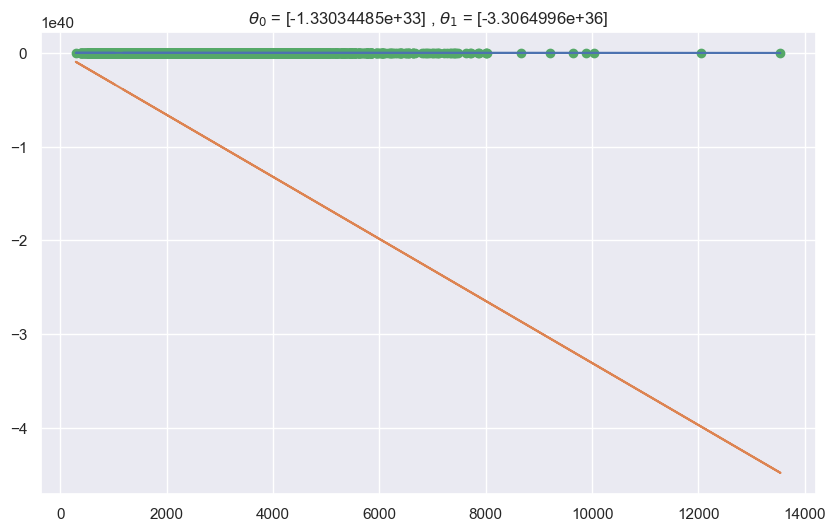

In [27]:
plt.figure(figsize=(10,6))
plt.title('$\\theta_0$ = {} , $\\theta_1$ = {}'.format(theta[0], theta[1]))
plt.scatter(x,y, marker='o', color='g')
plt.plot(x, np.dot(x.values, theta.T))
plt.show()

Text(0, 0.5, 'Cost')

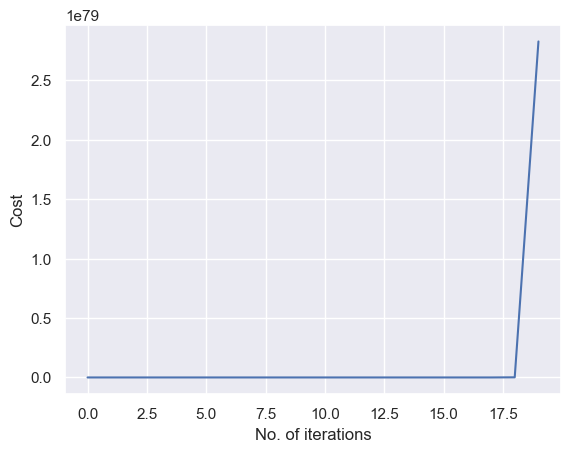

In [28]:
plt.plot(cost)
plt.xlabel('No. of iterations')
plt.ylabel('Cost')

### Multivariate Linear Regression - Manual Method: Gradient Descent

In [29]:
# Feature Normalization
x = X[['sqft_living', 'bedrooms', 'bathrooms', 'sqft_above', 'yr_built']]
y = Y
xm = x.values
ym = y.values
#xm = np.concatenate((np.ones(len(x)).reshape(-1,1), xm), axis=1) # (21613, 2)

In [30]:
def featureNormalize(X):
    mu = np.zeros((1, X.shape[1])) # (1, 5) # array([[0., 0., 0., 0., 0.]])
    sigma = np.zeros((1, X.shape[1]))
    x_norm = X.astype(float)
    
    for i in range(len(mu[0])): # for each column 
        mu[:,i] = X[:,i].mean()
        sigma[:,i] = X[:,i].std()
        x_norm[:,i] = (X[:,i] - mu[:,i])/sigma[:,i]
    return (x_norm, mu, sigma)

x_norm, mu, sigma = featureNormalize(xm) # mu: array([[2079.89973627, 3.37084162, 2.11475732,1788.39069079,1971.0051358]])
x_norm = np.concatenate((np.ones(len(x_norm)).reshape(-1,1), x_norm), axis=1)
x_norm.shape # (21613, 6)

(21613, 6)

In [31]:
def gradientDescentMulti(X, Y, theta, alpha, iterations):
    m = len(Y)
    x_copy = np.copy(X)
    theta_copy = np.copy(theta)
    cost_history = []
    print('Running Gradient Descent')
    for i in range(iterations+1):
        hypothesis = np.dot(x_copy, theta_copy)
        loss = hypothesis-y
        for f in range(theta.size):
            theta_copy[f] = theta_copy[f] - alpha/m *(np.sum((np.dot(x_copy[:,f].T, loss))))
        cost = cost_function(x_copy, Y, theta_copy)
        cost_history.append(cost)
    return cost_history, theta_copy

theta_init = np.zeros((6, 1))
iterations = 20 #1500, 0.01
alpha = 0.00001

theta_final, cost = gradientDescentMulti(x_norm, ym, theta_init, alpha, iterations)
print('Theta found by Gradient Descent: slope = {} and intercept {}'.format(theta_final[1], theta_final[0]))

Running Gradient Descent
Theta found by Gradient Descent: slope = 213226513410.2073 and intercept 213231092402.31757


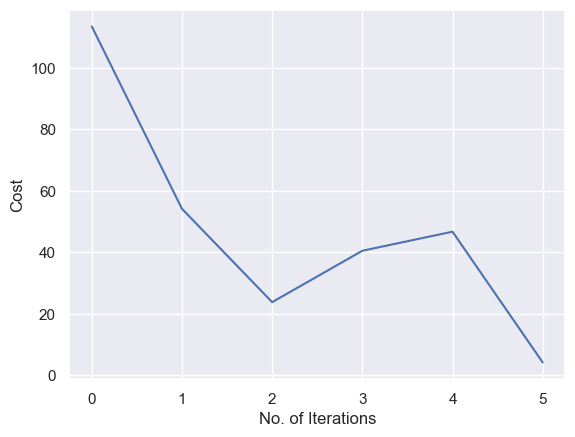

In [32]:
plt.figure()
plt.plot(cost)
plt.xlabel('No. of Iterations')
plt.ylabel('Cost')
plt.show()

### Multivariate Linear Regression - sklearn.linear_model

In [33]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

mlr = LinearRegression()
# Standardize features by removing the mean and scaling to unit variance.The standard score: z = (x - u) / s
scaler = StandardScaler()
xsl_norm = scaler.fit_transform(x) # (21613, 5) 
xsl_norm.shape

(21613, 5)

In [34]:
mlr.fit(xsl_norm, ym) 
y_hat = mlr.predict(xsl_norm)
# only take the sqrt column to fit (no constant) because fit_interceptbool, default=True
print('theta[0] = ', mlr.intercept_)
print('theta[1] = ', mlr.coef_)
mlr.score(xsl_norm, ym)

theta[0] =  [540088.14176653]
theta[1] =  [[249587.59029599 -63895.33279402  65257.28069645  29728.08020627
  -95324.26011362]]


0.55197385796728

### Multivariate Linear Regression - statsmodel.OLS

In [35]:
import statsmodels.api as sm
#d = sm.add_constant(X_new)
results = sm.OLS(ym, x_norm).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.552
Model:                            OLS   Adj. R-squared:                  0.552
Method:                 Least Squares   F-statistic:                     5324.
Date:                Fri, 17 May 2024   Prob (F-statistic):               0.00
Time:                        23:31:11   Log-Likelihood:            -2.9893e+05
No. Observations:               21613   AIC:                         5.979e+05
Df Residuals:                   21607   BIC:                         5.979e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       5.401e+05   1671.710    323.075      0.000    5.37e+05    5.43e+05
x1          2.496e+05   4201.280     59.408      0.000    2.41e+05    2.58e+05
x2          -6.39e+04   2086.076    -30.629      0.000    -6.8e+04   -5.98e+04
x3          6.526e+04   2873.101     22.713      0.000    5.96e+04    7.09e+04
x4          2.973e+04   3677.927      8.083      0.000    2.25e+04    3.69e+04
x5         -9.532e+04   2065.654    -46.147      0.000   -9.94e+04   -9.13e+04
==============================================================================
Omnibus:                    14147.498   Durbin-Watson:                   1.980
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           496350.223
Skew:                           2.644   Prob(JB):                         0.00
Kurtosis:                      25.874   Cond. No.                         5.79
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Regression works by optimizing the placement of the line of best fit (or plane in higher dimensions). It does so by defining how bad the fit is using an objective function. In ordinary least squares regression (OLS), what we use here, the objective function is:

$$\sum_{i=1}^n (Y_i - a - bX_i)^2$$

We use $a$ and $b$ to represent the potential candidates for $\alpha$ and $\beta$. What this objective function means is that for each point on the line of best fit we compare it with the real point and take the square of the difference. This function will decrease as we get better parameter estimates. Regression is a simple case of numerical optimization that has a closed form solution and does not need any optimizer. We just find the results that minimize the objective function.

We will denote the eventual model that results from minimizing our objective function as:

$$ \hat{Y} = \hat{\alpha} + \hat{\beta}X $$

With $\hat{\alpha}$ and $\hat{\beta}$ being the chosen estimates for the parameters that we use for prediction and $\hat{Y}$ being the predicted values of $Y$ given the estimates.

We can also find the standard error of estimate, which measures the standard deviation of the error term $\epsilon$, by getting the `scale` parameter of the model returned by the regression and taking its square root. The formula for standard error of estimate is
$$ s = \left( \frac{\sum_{i=1}^n \epsilon_i^2}{n-2} \right)^{1/2} $$

If $\hat{\alpha}$ and $\hat{\beta}$ were the true parameters ($\hat{\alpha} = \alpha$ and $\hat{\beta} = \beta$), we could represent the error for a particular predicted value of $Y$ as $s^2$ for all values of $X_i$. We could simply square the difference $(Y - \hat{Y})$ to get the variance because $\hat{Y}$ incorporates no error in the parameter estimates themselves. Because $\hat{\alpha}$ and $\hat{\beta}$ are merely estimates in our construction of the model of $Y$, any predicted values , $\hat{Y}$, will have their own standard error based on the distribution of the $X$ terms that we plug into the model. This forecast error is represented by the following:

$$ s_f^2 = s^2 \left( 1 + \frac{1}{n} + \frac{(X - \mu_X)^2}{(n-1)\sigma_X^2} \right) $$

where $\mu_X$ is the mean of our observations of $X$ and $\sigma_X$ is the standard deviation of $X$. This adjustment to $s^2$ incorporates the uncertainty in our parameter estimates. Then the 95% confidence interval for the prediction is $\hat{Y} \pm t_cs_f$, where $t_c$ is the critical value of the t-statistic for $n$ samples and a desired 95% confidence.

### Example: Using macro variables to predict national median house price

In [37]:
my_key='8c043491aed74a18c010c53625028825'
fred = FRED(api_key=my_key)
# https://fred.stlouisfed.org/series/DGS2

Fixed_30Y_Mtge = fred.series_observations(series_id="MORTGAGE30US").resample('M').last().value
Fed_Funds = fred.series_observations(series_id="FEDFUNDS").resample('M').last().value
CPI = fred.series_observations(series_id="CPIAUCSL").resample('M').last().value
Unemployment = fred.series_observations(series_id="UNRATE").resample('M').last().value
Nonfarm_Job_Opening = fred.series_observations(series_id="JTSJOL").resample('M').last().value
Diff_10Y_3M = fred.series_observations(series_id="T10Y3M").resample('M').last().value
Diff_10Y_2Y = fred.series_observations(series_id="T10Y2Y").resample('M').last().value
Breakeven_10Y_Inflation = fred.series_observations(series_id="T10YIE").resample('M').last().value
HY_OAS = fred.series_observations(series_id="BAMLH0A0HYM2").resample('M').last().value
Credit_Card_Deliq = fred.series_observations(series_id="DRCCLACBS").resample('M').ffill().value
Home_Price = fred.series_observations(series_id="CSUSHPINSA").resample('M').last().value
Median_House_Price = fred.series_observations(series_id="MSPUS").resample('M').ffill().value
Yield_2Y = fred.series_observations(series_id="DGS2").resample('M').last().value
Yield_10Y = fred.series_observations(series_id="DFII10").resample('M').last().value
Yield_30Y = fred.series_observations(series_id="DGS30").resample('M').last().value
PPI = fred.series_observations(series_id="PCUOMFGOMFG").resample('M').last().value
AAA_Corp_Yield = fred.series_observations(series_id="WAAA").resample('M').last().value

In [38]:
start = pd.to_datetime('1/31/2005')
end = pd.to_datetime('12/31/2023')
dep_var = pd.DataFrame({"Median_House_Price": Median_House_Price})[start:end]
ind_var = pd.DataFrame({"Fixed_30Y_Mtge": Fixed_30Y_Mtge,"Fed_Funds": Fed_Funds,
                       "CPI": CPI,"Unemployment": Unemployment,
                       "Nonfarm_Job_Opening": Nonfarm_Job_Opening,"Diff_10Y_3M": Diff_10Y_3M,
                       "Diff_10Y_2Y": Diff_10Y_2Y,"Breakeven_10Y_Inflation": Breakeven_10Y_Inflation,
                       "HY_OAS": HY_OAS,"Credit_Card_Deliq": Credit_Card_Deliq,
                       "Home_Price": Home_Price,"Yield_2Y": Yield_2Y,
                       "Yield_10Y": Yield_10Y,"Yield_30Y": Yield_30Y,
                       "PPI": PPI,"AAA_Corp_Yield": AAA_Corp_Yield})[start:end]
ind_var.describe()

,Fixed_30Y_Mtge,Fed_Funds,CPI,Unemployment,Nonfarm_Job_Opening,Diff_10Y_3M,Diff_10Y_2Y,Breakeven_10Y_Inflation,HY_OAS,Credit_Card_Deliq,Home_Price,Yield_2Y,Yield_10Y,Yield_30Y,PPI,AAA_Corp_Yield
count,228.000000,228.000000,228.000000,228.000000,228.000000,228.000000,228.000000,228.000000,228.000000,226.000000,228.000000,228.000000,228.000000,228.000000,228.000000,228.000000
mean,4.683860,1.504211,238.539667,5.910526,5654.995614,1.360702,1.047632,2.069649,5.264430,3.172611,191.292338,1.770395,0.748377,3.414079,190.332575,4.292325
std,1.190651,1.819225,28.558706,2.155308,2395.385552,1.225183,0.953200,0.416931,2.635789,1.268230,48.424869,1.618653,0.992525,0.975238,25.613994,0.969837
min,2.670000,0.050000,191.600000,3.400000,2232.000000,-1.880000,-1.060000,0.110000,2.460000,1.540000,133.996000,0.110000,-1.160000,1.200000,146.200000,2.030000
25%,3.787500,0.117500,217.287750,4.300000,3954.500000,0.525000,0.235000,1.800000,3.710000,2.277500,158.943250,0.450000,0.135000,2.797500,174.775000,3.645000
50%,4.385000,0.375000,236.125000,5.000000,4852.500000,1.500000,1.005000,2.150000,4.550000,2.610000,179.397000,1.010000,0.615000,3.240000,190.200000,4.140000
75%,5.770000,2.400000,254.511000,7.525000,6879.750000,2.160000,1.830000,2.370000,5.972500,3.937500,206.255500,2.802500,1.592500,4.325000,196.525000,5.212500
max,7.790000,5.330000,308.742000,14.800000,12182.000000,3.790000,2.840000,2.880000,19.880000,6.770000,312.765000,5.160000,3.140000,5.210000,262.418000,6.420000


In [39]:
ind_var.Credit_Card_Deliq.fillna(method='ffill', inplace=True) # inplace=True is necessary
ind_var.describe()

,Fixed_30Y_Mtge,Fed_Funds,CPI,Unemployment,Nonfarm_Job_Opening,Diff_10Y_3M,Diff_10Y_2Y,Breakeven_10Y_Inflation,HY_OAS,Credit_Card_Deliq,Home_Price,Yield_2Y,Yield_10Y,Yield_30Y,PPI,AAA_Corp_Yield
count,228.000000,228.000000,228.000000,228.000000,228.000000,228.000000,228.000000,228.000000,228.000000,228.000000,228.000000,228.000000,228.000000,228.000000,228.000000,228.000000
mean,4.683860,1.504211,238.539667,5.910526,5654.995614,1.360702,1.047632,2.069649,5.264430,3.171974,191.292338,1.770395,0.748377,3.414079,190.332575,4.292325
std,1.190651,1.819225,28.558706,2.155308,2395.385552,1.225183,0.953200,0.416931,2.635789,1.262649,48.424869,1.618653,0.992525,0.975238,25.613994,0.969837
min,2.670000,0.050000,191.600000,3.400000,2232.000000,-1.880000,-1.060000,0.110000,2.460000,1.540000,133.996000,0.110000,-1.160000,1.200000,146.200000,2.030000
25%,3.787500,0.117500,217.287750,4.300000,3954.500000,0.525000,0.235000,1.800000,3.710000,2.292500,158.943250,0.450000,0.135000,2.797500,174.775000,3.645000
50%,4.385000,0.375000,236.125000,5.000000,4852.500000,1.500000,1.005000,2.150000,4.550000,2.615000,179.397000,1.010000,0.615000,3.240000,190.200000,4.140000
75%,5.770000,2.400000,254.511000,7.525000,6879.750000,2.160000,1.830000,2.370000,5.972500,3.912500,206.255500,2.802500,1.592500,4.325000,196.525000,5.212500
max,7.790000,5.330000,308.742000,14.800000,12182.000000,3.790000,2.840000,2.880000,19.880000,6.770000,312.765000,5.160000,3.140000,5.210000,262.418000,6.420000


In [40]:
ind_var.isnull().sum()

Fixed_30Y_Mtge             0
Fed_Funds                  0
CPI                        0
Unemployment               0
Nonfarm_Job_Opening        0
Diff_10Y_3M                0
Diff_10Y_2Y                0
Breakeven_10Y_Inflation    0
HY_OAS                     0
Credit_Card_Deliq          0
Home_Price                 0
Yield_2Y                   0
Yield_10Y                  0
Yield_30Y                  0
PPI                        0
AAA_Corp_Yield             0
dtype: int64

In [41]:
dep_var.isnull().sum()

Median_House_Price    0
dtype: int64

<AxesSubplot:>

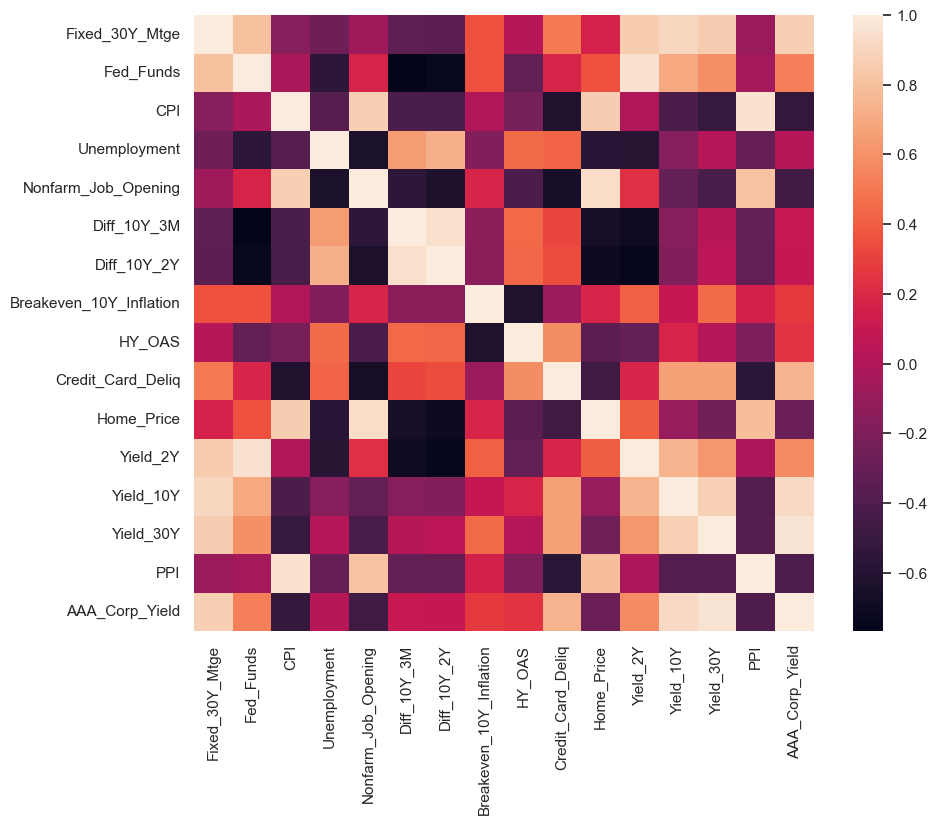

In [42]:
plt.subplots(figsize=(10,8))
sns.heatmap(ind_var.corr())

### Data Scaling and Normalization

In [43]:
# 1. preprocessing.StandardScaler
from sklearn.preprocessing import StandardScaler
# Standardize features by removing the mean and scaling to unit variance.The standard score: z = (x - u) / s
# Centering and scaling happen independently on each feature by computing the relevant statistics on the samples 
# in the training set. Mean and standard deviation are then stored to be used on later data using transform.
first_3_col = ind_var.iloc[:, :3]
scaler = StandardScaler()
s1 = scaler.fit_transform(first_3_col)
#s1.shape #(228, 3)
# np.mean(s1, axis=0) # array([-9.34924652e-17, -7.79103877e-17,  6.23283102e-16])
# np.std(s1, axis=0) # array([1., 1., 1.])

# 2. preprocessing.scale
from sklearn import preprocessing
# Standardize a dataset along any axis (default=0, along columns). Center to the mean and component wise scale to unit variance.
s2 = preprocessing.scale(first_3_col) #(axis=0, can be ommitted)
# shape, mean, std are all the same as s1

dep_var = np.log(dep_var)
features = ind_var.columns
date = ind_var.index
ind_var = pd.DataFrame(scaler.fit_transform(ind_var), columns=features, index=date)
ind_var.head()

,Fixed_30Y_Mtge,Fed_Funds,CPI,Unemployment,Nonfarm_Job_Opening,Diff_10Y_3M,Diff_10Y_2Y,Breakeven_10Y_Inflation,HY_OAS,Credit_Card_Deliq,Home_Price,Yield_2Y,Yield_10Y,Yield_30Y,PPI,AAA_Corp_Yield
date,,,,,,,,,,,,,,,,
2005-01-31,0.821641,0.427378,-1.647237,-0.283890,-0.774434,0.220286,-0.207791,1.010420,-0.750733,0.419109,-0.644956,0.940874,0.910412,1.239261,-1.726778,1.020634
2005-02-28,0.846893,0.548575,-1.619162,-0.237391,-0.707074,0.195746,-0.291904,1.419059,-0.925638,0.419109,-0.607827,1.126621,0.960900,1.331749,-1.695476,1.041301
2005-03-31,1.141497,0.620191,-1.594598,-0.330389,-0.674021,0.285726,-0.365502,1.539246,-0.663281,0.419109,-0.552942,1.256644,1.051777,1.383131,-1.621135,1.216974
2005-04-30,0.922648,0.708334,-1.573542,-0.330389,-0.625906,-0.041474,-0.523213,1.274833,-0.408528,0.395298,-0.502774,1.169962,0.870022,1.146773,-1.593746,0.968966
2005-05-31,0.813224,0.824022,-1.577051,-0.376888,-0.777363,-0.286874,-0.680924,0.721970,-0.431342,0.395298,-0.450103,1.132813,0.890217,0.972073,-1.601571,0.813960


### Correlation/p-value Selection

In [44]:
from scipy.stats import pearsonr
feature_list = list(ind_var.columns.values)

def calculate_correlation_p_value(X, y, feature_list):
    return [(feature,) + pearsonr(X[feature], y) for feature in feature_list]

stats = calculate_correlation_p_value(ind_var, dep_var, feature_list)
ret = pd.DataFrame(stats, columns = ['feature', 'correlation', 'p_value'])

def select_by_correlation(df, threshold=0.4):
    return df[abs(df.correlation > threshold)]

ret1 = select_by_correlation(ret)

def select_by_p_value(df, threshold=0.05):
    return df[df.p_value < threshold]

ret2 = select_by_p_value(ret)

In [45]:
ret

,feature,correlation,p_value
0,Fixed_30Y_Mtge,[-0.14901256243440716],2.443299e-02
1,Fed_Funds,[0.09282584308243659],1.624275e-01
2,CPI,[0.9292708703899979],1.023304e-99
3,Unemployment,[-0.5705441174362448],4.342274e-21
4,Nonfarm_Job_Opening,[0.9544253051561461],1.162570e-120
5,Diff_10Y_3M,[-0.5359136835442315],2.375822e-18
6,Diff_10Y_2Y,[-0.589608621026522],9.716967e-23
7,Breakeven_10Y_Inflation,[0.06989009073056104],2.933494e-01
8,HY_OAS,[-0.4103765516268241],1.127419e-10
9,Credit_Card_Deliq,[-0.7285740850213079],5.267515e-39


In [46]:
ret1

,feature,correlation,p_value
2,CPI,[0.9292708703899979],1.023304e-99
4,Nonfarm_Job_Opening,[0.9544253051561461],1.162570e-120
10,Home_Price,[0.916793827436411],4.681339e-92
14,PPI,[0.8442840217459723],3.709742e-63


In [47]:
ret2

,feature,correlation,p_value
0,Fixed_30Y_Mtge,[-0.14901256243440716],2.443299e-02
2,CPI,[0.9292708703899979],1.023304e-99
3,Unemployment,[-0.5705441174362448],4.342274e-21
4,Nonfarm_Job_Opening,[0.9544253051561461],1.162570e-120
5,Diff_10Y_3M,[-0.5359136835442315],2.375822e-18
6,Diff_10Y_2Y,[-0.589608621026522],9.716967e-23
8,HY_OAS,[-0.4103765516268241],1.127419e-10
9,Credit_Card_Deliq,[-0.7285740850213079],5.267515e-39
10,Home_Price,[0.916793827436411],4.681339e-92
11,Yield_2Y,[0.13711934712120372],3.855934e-02


### Best Subset Selection

In [48]:
def process_subset(X, y, feature_set):
    model = sm.OLS(y, X[list(feature_set)])
    res = model.fit()
    RSS = res.ssr  
    return {'model': res, 'RSS': res.ssr}

process_subset(ind_var, dep_var, features[:5])

{'model': <statsmodels.regression.linear_model.RegressionResultsWrapper at 0x7fe2b84c9040>,
 'RSS': 36014.38206054435}

In [50]:
import itertools
def select_best_subset(X, y, k):
    results = [process_subset(X, y, combo) for combo in itertools.combinations(X.columns, k)]
    models = pd.DataFrame(results)
    # choose the model with lowest RSS
    best_model = models.loc[models['RSS'].argmin()] 
    #numpy.argmin() method returns indices of the min element of the array in a particular axis
    print("Processed {} models on {} predictors".format(models.shape[0], k))
    return best_model

models = pd.DataFrame(columns = ['RSS', 'model'])
for i in range(1,8):
    models.loc[i] = select_best_subset(ind_var, dep_var, i)

Processed 16 models on 1 predictors
Processed 120 models on 2 predictors
Processed 560 models on 3 predictors
Processed 1820 models on 4 predictors
Processed 4368 models on 5 predictors
Processed 8008 models on 6 predictors
Processed 11440 models on 7 predictors


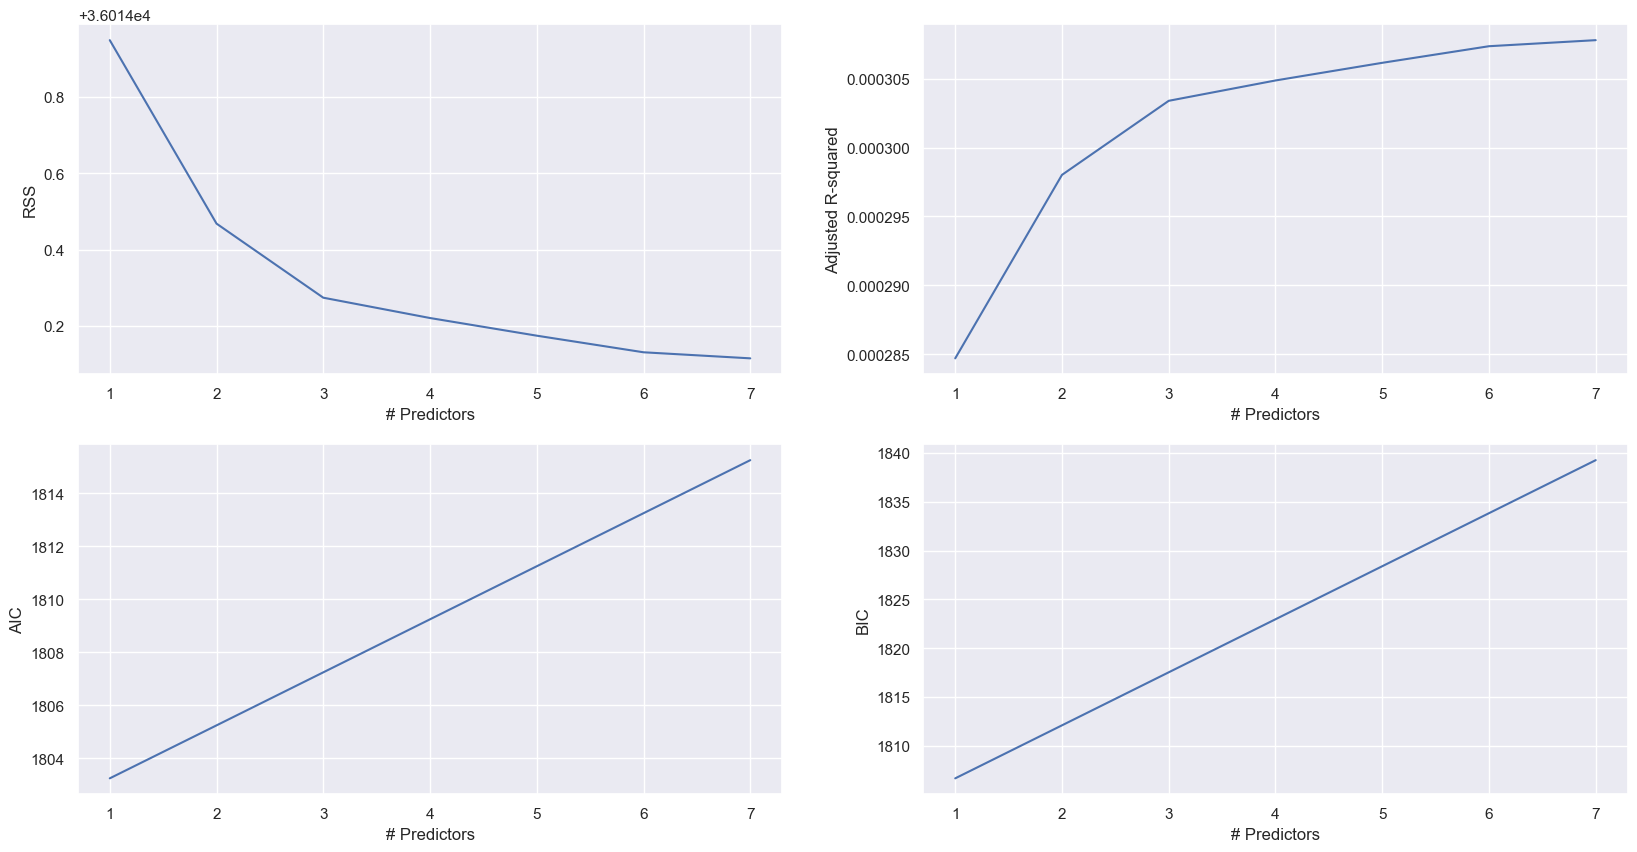

In [51]:
def plot_selection_result(models):
    plt.figure(figsize=(20, 10))
    
    plt.subplot(2, 2, 1)
    plt.plot(models.RSS)
    plt.xlabel('# Predictors')
    plt.ylabel('RSS')
    
    plt.subplot(2, 2, 2)
    rsquared = models.apply(lambda row: row[1].rsquared, axis=1)
    plt.plot(rsquared)
    plt.xlabel('# Predictors')
    plt.ylabel('Adjusted R-squared')
    
    plt.subplot(2, 2, 3)
    aic = models.apply(lambda row: row[1].aic, axis=1)
    plt.plot(aic)
    plt.xlabel('# Predictors')
    plt.ylabel('AIC')
    
    plt.subplot(2, 2, 4)
    bic = models.apply(lambda row: row[1].bic, axis=1)
    plt.plot(bic)
    plt.xlabel('# Predictors')
    plt.ylabel('BIC')
plot_selection_result(models)

### Forward Stepwise & Backward Stepwise Selection

Processed 16 models on 1 predictors
Processed 15 models on 2 predictors
Processed 14 models on 3 predictors
Processed 13 models on 4 predictors
Processed 12 models on 5 predictors
Processed 11 models on 6 predictors
Processed 10 models on 7 predictors
Processed 9 models on 8 predictors
Processed 8 models on 9 predictors
Processed 7 models on 10 predictors
Processed 6 models on 11 predictors
Processed 5 models on 12 predictors
Processed 4 models on 13 predictors
Processed 3 models on 14 predictors
Processed 2 models on 15 predictors
Processed 1 models on 16 predictors


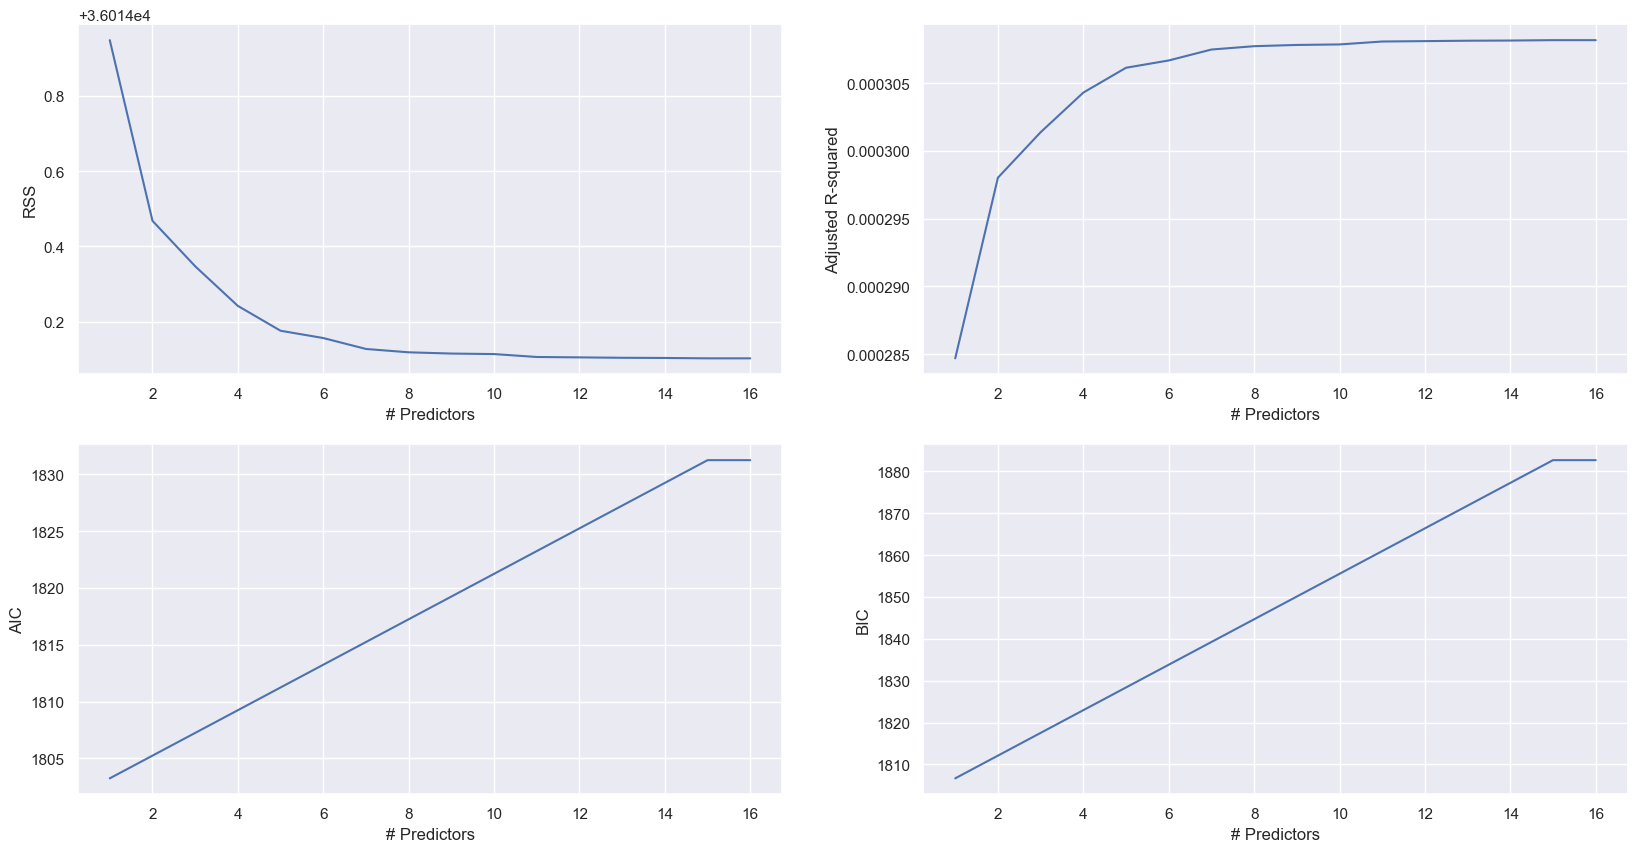

In [52]:
def select_forward_stepwise(X, y, init_pred):
    remaining_pred = [p for p in X.columns if p not in init_pred]
    results = [process_subset(X, y, init_pred+[p]) for p in remaining_pred] # each time add one more p
    models = pd.DataFrame(results)
    # choose the model with lowest RSS
    best_model = models.loc[models['RSS'].argmin()]
    print("Processed {} models on {} predictors".format(models.shape[0], len(init_pred)+1)) # each time +1
    return best_model

models2 = pd.DataFrame(columns = ['RSS', 'model'])
predictors = [] # start from empty set
for i in range(1,len(ind_var.columns)+1):
    models2.loc[i] = select_forward_stepwise(ind_var, dep_var, predictors)
    predictors = models2.loc[i]['model'].model.exog_names
# models2.model[3].model.exog_names #['Home_Price', 'Fed_Funds', 'CPI']
plot_selection_result(models2)

Processed 16 models on 15 predictors
Processed 15 models on 14 predictors
Processed 14 models on 13 predictors
Processed 13 models on 12 predictors
Processed 12 models on 11 predictors
Processed 11 models on 10 predictors
Processed 10 models on 9 predictors
Processed 9 models on 8 predictors
Processed 8 models on 7 predictors
Processed 7 models on 6 predictors
Processed 6 models on 5 predictors
Processed 5 models on 4 predictors
Processed 4 models on 3 predictors
Processed 3 models on 2 predictors
Processed 2 models on 1 predictors


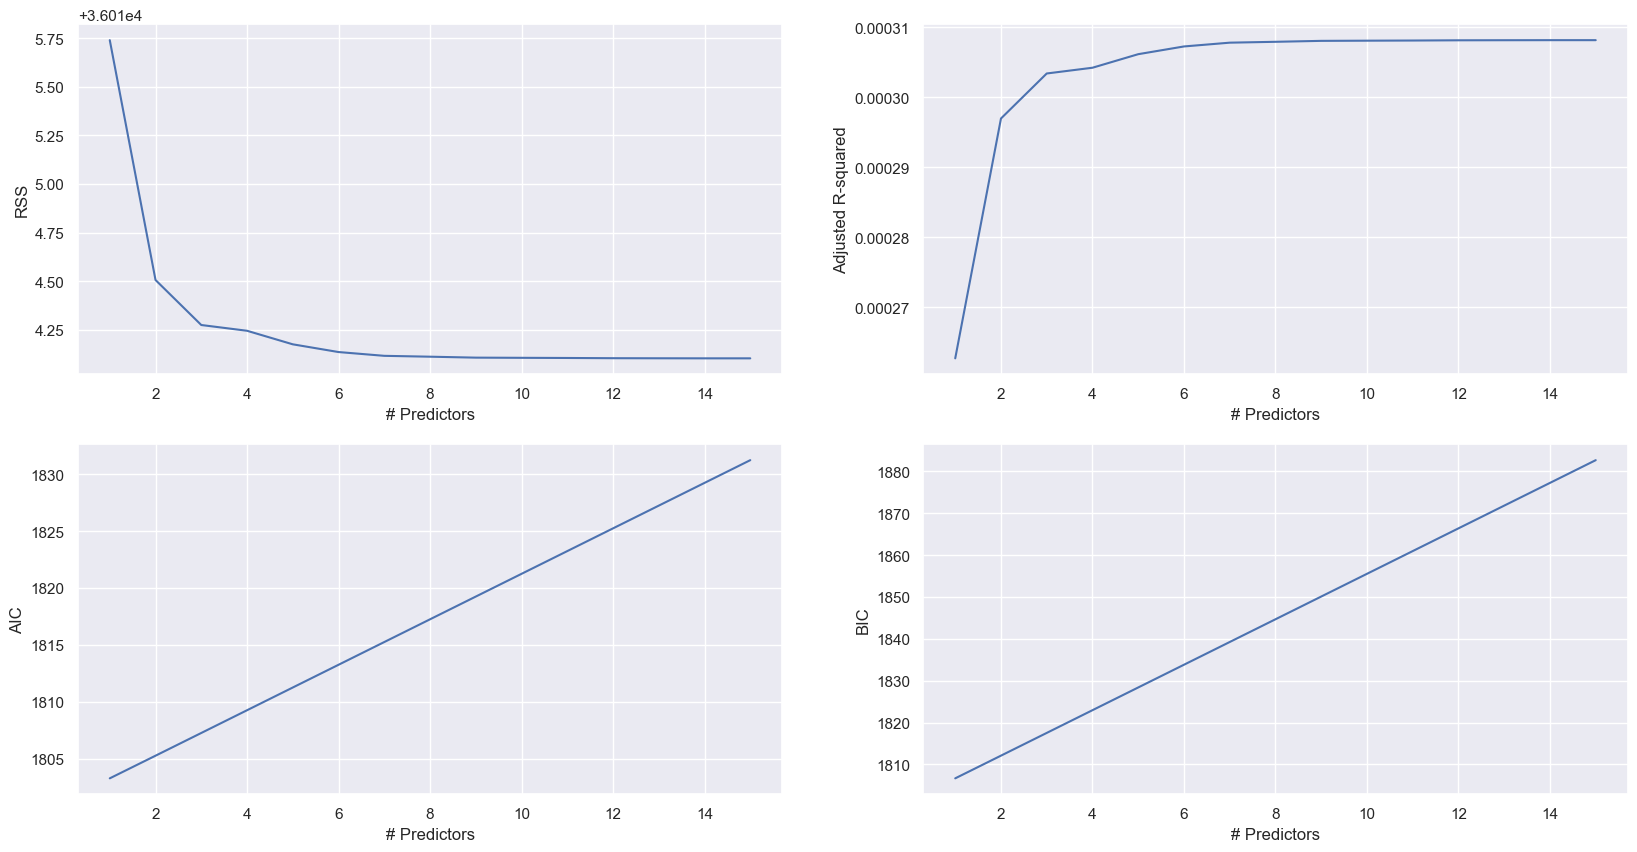

In [53]:
def select_backward_stepwise(X, y, init_pred):
    results = [process_subset(X, y, combo) for combo in itertools.combinations(init_pred, len(init_pred)-1)] 
    # each time reduce one p when choosing the number of subset in combination function
    models = pd.DataFrame(results)
    # choose the model with lowest RSS
    best_model = models.loc[models['RSS'].argmin()]
    print("Processed {} models on {} predictors".format(models.shape[0], len(init_pred)-1)) # each time -1
    return best_model

models3 = pd.DataFrame(columns = ['RSS', 'model'], index=range(1, len(ind_var.columns)))
predictors = ind_var.columns # start from full set
while len(predictors) > 1:
    models3.loc[len(predictors)-1] = select_backward_stepwise(ind_var, dep_var, predictors)
    predictors = models3.loc[len(predictors)-1]['model'].model.exog_names
# models3.model[3].model.exog_names #['CPI', 'Credit_Card_Deliq', 'Home_Price']
plot_selection_result(models3)

### Random Forest Selection

In [54]:
from sklearn.ensemble import RandomForestRegressor
def select_random_forest(X, y, predictors, n_estimators=300, oob_score=True, random_state=42):
    rf = RandomForestRegressor(n_estimators=n_estimators, oob_score=oob_score, random_state=random_state)
    # oob_score: Whether to use out-of-bag samples to estimate the generalization score
    rf.fit(X, y)
    return pd.DataFrame(sorted(zip(map(lambda x: round(x, 4), rf.feature_importances_), predictors), reverse=True))
select_random_forest(ind_var, dep_var, ind_var.columns)

/var/folders/qw/0f3qsf1n4k3_rbcq1_w64qm00000gn/T/ipykernel_46694/2888789157.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(X, y)


,0,1
0,0.6577,CPI
1,0.1861,Nonfarm_Job_Opening
2,0.0704,Home_Price
3,0.0365,PPI
4,0.0293,Credit_Card_Deliq
5,0.0040,HY_OAS
6,0.0037,Breakeven_10Y_Inflation
7,0.0032,Unemployment
8,0.0029,Diff_10Y_3M
9,0.0015,Diff_10Y_2Y


### LASSO Selection

In [55]:
from sklearn.linear_model import Lasso, LassoCV
from sklearn import preprocessing
def select_lasso(X, y, cv=10, max_iter=1000, alphas=None):
    # LassoCV: Lasso linear model with iterative fitting along a regularization path. The best model is selected by cross-validation.
    lasso_cv = LassoCV(alphas=None, cv=cv, max_iter=max_iter)
    lasso_cv.fit(X, y)
    cv_alpha = lasso_cv.alpha_
    print('alpha CV: ', cv_alpha) # can use cv_alpha as threshold for alpha progression
    
    lasso = Lasso(max_iter=max_iter)
    coefs = []
    if alphas.any():
        for alpha in alphas:
            lasso.set_params(alpha=alpha)
            lasso.fit(X, y)
            coefs.append(lasso.coef_)
            #print(lasso.coef_, lasso.intercept_)
    return coefs, cv_alpha

alphas = np.logspace(-2.0, 0.0, num=20) # Return numbers spaced evenly on a log scale
y_lasso = np.log(dep_var)
x_lasso = preprocessing.scale(ind_var.CPI).reshape(-1,1)
coefs, cv_alpha = select_lasso(x_lasso, y_lasso, alphas=alphas)
cv_alpha

alpha CV:  0.0007068875117370961


/Users/l/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:1571: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.0007068875117370961

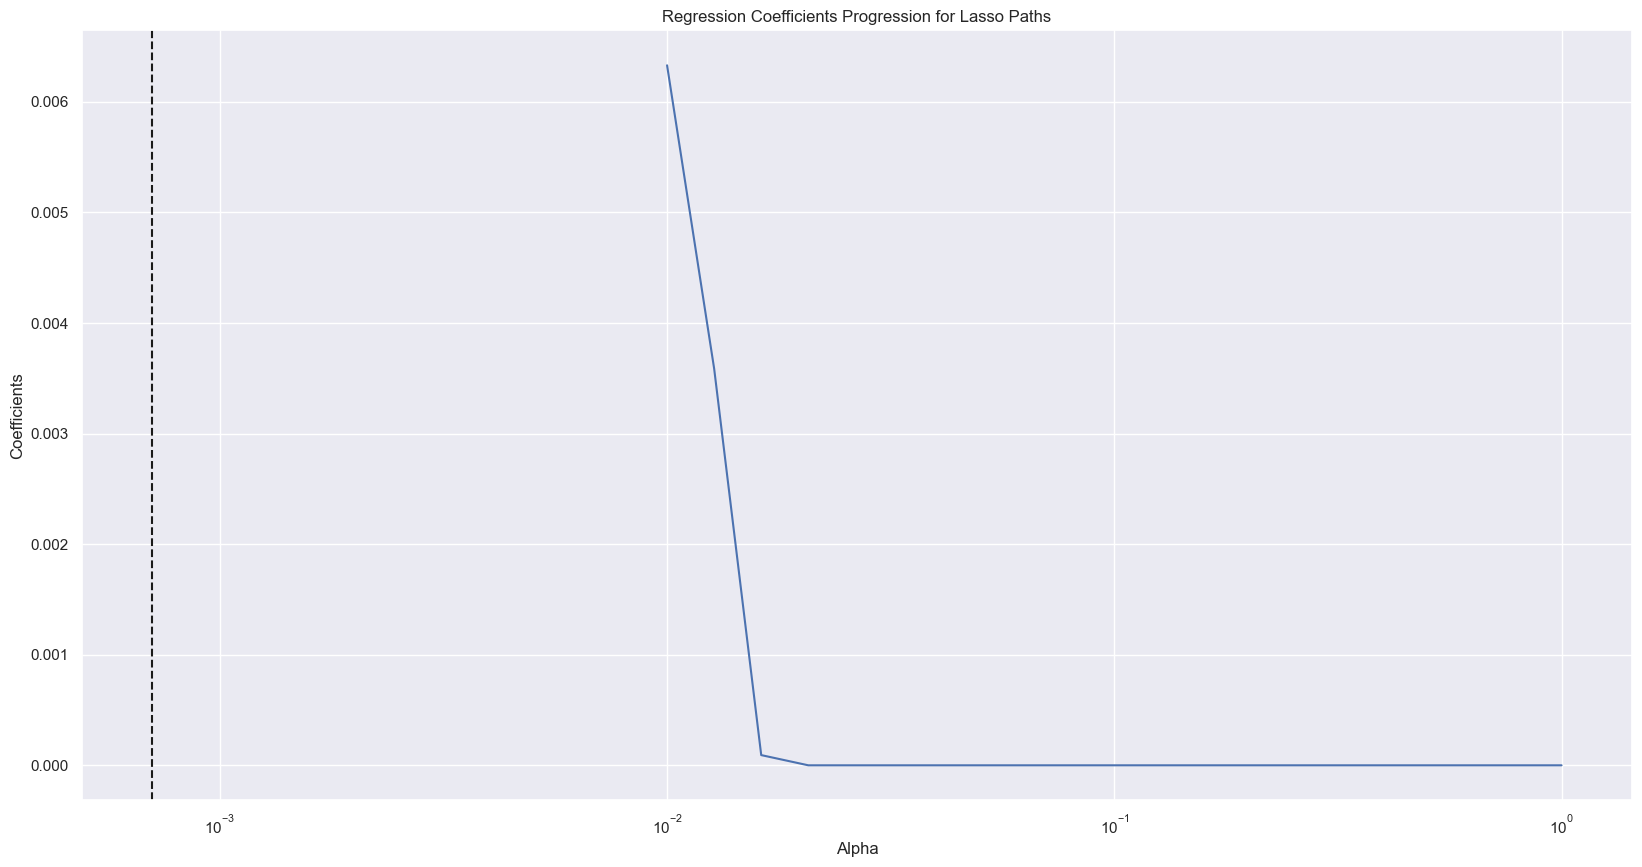

In [56]:
def plot_lasso(alphas, coefs, threshold=None):
    plt.figure(figsize=(20, 10))
    plt.plot(alphas, coefs)
    plt.xlabel('Alpha')
    plt.ylabel('Coefficients')
    # below are optional:
    ax = plt.gca() #Get the current Axes. If there is no Axes, a new one is created using Figure.add_subplot.
    ax.set_xscale('log')
    plt.title('Regression Coefficients Progression for Lasso Paths')
    plt.axvline(threshold, linestyle='--', color='k', label='alpha cv')
    
plot_lasso(alphas, coefs, cv_alpha)

class sklearn.linear_model.Lasso(alpha=1.0, *, fit_intercept=True, precompute=False, copy_X=True, max_iter=1000, 
                                 tol=0.0001, warm_start=False, positive=False, random_state=None, 
                                 selection='cyclic')
Linear Model trained with L1 prior as regularizer (aka the Lasso).

The optimization objective for Lasso is:
(1 / (2 * n_samples)) * ||y - Xw||^2_2 + alpha * ||w||_1
Technically the Lasso model is optimizing the same objective function as the Elastic Net with l1_ratio=1.0 
(no L2 penalty).

alpha: The amount of penalization chosen by cross validation.

coef: Parameter vector (w in the cost function formula).

intercept: Independent term in decision function.

### Fit Model and Run Diagnostics

In [57]:
selected = ['CPI','Nonfarm_Job_Opening', 'Credit_Card_Deliq','Fixed_30Y_Mtge']
new_x = ind_var[selected]
new_x = sm.add_constant(new_x)
# add trend term if necessary 
# import statsmodels.tsa.tsatools as tsatools
# final_x = tsatools.add_trend(new_x, trend='t')
reg = sm.OLS(dep_var, new_x).fit()
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     Median_House_Price   R-squared:                       0.965
Model:                            OLS   Adj. R-squared:                  0.965
Method:                 Least Squares   F-statistic:                     1546.
Date:                Fri, 17 May 2024   Prob (F-statistic):          2.69e-161
Time:                        23:32:55   Log-Likelihood:                 402.22
No. Observations:                 228   AIC:                            -794.4
Df Residuals:                     223   BIC:                            -777.3
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  12.5681      0.003   4526.977      0.000      12.563      12.574
CPI                     0.0885      0.006     15.598      0.000       0.077       0.100
Nonfarm_Job_Opening     0.1109      0.006     17.333      0.000       0.098       0.124
Credit_Card_Deliq      -0.0380      0.005     -8.025      0.000      -0.047      -0.029
Fixed_30Y_Mtge          0.0087      0.004      2.407      0.017       0.002       0.016
==============================================================================
Omnibus:                        5.919   Durbin-Watson:                   0.292
Prob(Omnibus):                  0.052   Jarque-Bera (JB):                5.629
Skew:                          -0.334   Prob(JB):                       0.0599
Kurtosis:                       3.381   Cond. No.                         4.83
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Multicollinearity occurs when there are two or more independent variables in a multiple regression model, which have a high correlation among themselves. When some features are highly correlated, we might have difficulty in distinguishing between their individual effects on the dependent variable. Multicollinearity can be detected using various techniques, one such technique being the Variance Inflation Factor(VIF).

In VIF method, we pick each feature and regress it against all of the other features. For each regression, the factor is calculated as :

VIF=\frac{1}{1-R^2}
Where, R-squared is the coefficient of determination in linear regression. Its value lies between 0 and 1.

As we see from the formula, greater the value of R-squared, greater is the VIF. Hence, greater VIF denotes greater correlation. This is in agreement with the fact that a higher R-squared value denotes a stronger collinearity. Generally, a VIF above 5 indicates a high multicollinearity. 

In [170]:
# Goodness of fit statistics
rsq = reg.rsquared
adj_rsq = reg.rsquared_adj
rmse_resid = np.sqrt(reg.mse_resid)
mae_resid = np.sum(np.abs(reg.resid)) / reg.df_resid

# Another implementation of RMSE and MAE calculation from scratch
rmse_resid2 = np.sqrt(np.sum(np.square(dep_var.iloc[:,0].to_list() - reg.predict(new_x))) / reg.df_resid)
mae_resid2 = np.sum(np.abs(dep_var.iloc[:,0].to_list() - reg.predict(new_x))) / (n_obs - new_x.shape[1]) 
# reg.df_resid == n_obs - new_x.shape[1] == 223

goodness_of_fit = pd.DataFrame(np.array([[rsq], [adj_rsq], [rmse_resid], [mae_resid]]), 
                               index=['R-squared','Adjusted R-squared','Residual RMSE','Residual MAE'],
                              columns=['Value'])
goodness_of_fit

,Value
R-squared,0.965194
Adjusted R-squared,0.964570
Residual RMSE,0.041921
Residual MAE,0.033706


In [59]:
# Residual statistics
from scipy.stats import skew, kurtosis, norm
resid = reg.resid
n_obs = reg.nobs
mean_resid = np.mean(resid)
std_resid = np.std(resid)
skew_resid = skew(resid)
excess_kurt_resid = kurtosis(resid)
min_resid = np.min(resid)
q05_resid = np.percentile(resid, 5)
q25_resid = np.percentile(resid, 25)
med_resid = np.median(resid)
q75_resid = np.percentile(resid, 75)
q95_resid = np.percentile(resid, 95)
max_resid = np.max(resid)
resid_stats = pd.DataFrame(np.round(np.array([[n_obs], [mean_resid], [std_resid], [skew_resid],
                                    [excess_kurt_resid], [min_resid], [q05_resid], [q25_resid],
                                    [med_resid], [q75_resid], [q95_resid], [max_resid]]), 4), 
                               index=['N','Mean','Std. Dev','Skewness','Excess Kurtosis','Min','5%','25%','Median',
                                     '75%','95%','Max'],
                              columns=['Residuals'])
resid_stats

,Residuals
N,228.0000
Mean,0.0000
Std. Dev,0.0415
Skewness,-0.3343
Excess Kurtosis,0.3813
Min,-0.1312
5%,-0.0702
25%,-0.0257
Median,0.0017
75%,0.0279


In [60]:
# Seasonality test
from sklearn.preprocessing import OneHotEncoder

seasons = pd.DataFrame(np.concatenate([np.atleast_2d(new_x.index.quarter.values),
                                      np.atleast_2d(new_x.index.month.values)]).T, 
                       index=new_x.index.values, columns=['Quarter','Month'])
residual = pd.DataFrame(resid, index=new_x.index.values, columns=['Residual'])
# residual = residual.dropna()
# dep_var = dep_var.dropna()
seasonality_df = pd.concat([dep_var, residual, seasons], axis=1)

# one-hot encode seasons
seasonality_df_seasons = seasonality_df[['Quarter','Month']]
ohe = OneHotEncoder(sparse=False)
ohe_seasons = ohe.fit_transform(seasonality_df_seasons)
ohe_seasons_df = pd.DataFrame(ohe_seasons, index=new_x.index.values, 
                              columns=['Q1','Q2','Q3','Q4',
                                      'Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])
seasonality_df = pd.concat([seasonality_df, ohe_seasons_df], axis=1)
seasonality_df.head()

,Median_House_Price,Residual,Quarter,Month,Q1,Q2,Q3,Q4,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
2005-01-31,12.356646,0.029065,1,1,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2005-02-28,12.356646,0.018888,1,2,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2005-03-31,12.356646,0.010488,1,3,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2005-04-30,12.361794,0.009432,2,4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2005-05-31,12.361794,0.027495,2,5,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


<AxesSubplot:xlabel='Quarter', ylabel='Residual'>

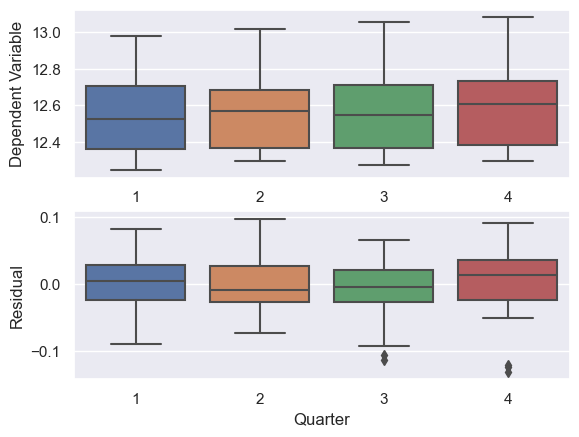

In [61]:
# Create seasonality plots - quarterly
plt.figure(1)
ax1_q = plt.subplot(2, 1, 1)
sns.boxplot(data=seasonality_df, x='Quarter', y=dep_var.columns.values[0], ax=ax1_q)
ymin, ymax = ax1_q.get_ylim()
ax1_q.set_ylabel('Dependent Variable')

ax2_q = plt.subplot(2, 1, 2)
sns.boxplot(data=seasonality_df, x='Quarter', y='Residual', ax=ax2_q)
#ax2_q.set_ylim((ymin, ymax))

<AxesSubplot:xlabel='Month', ylabel='Residual'>

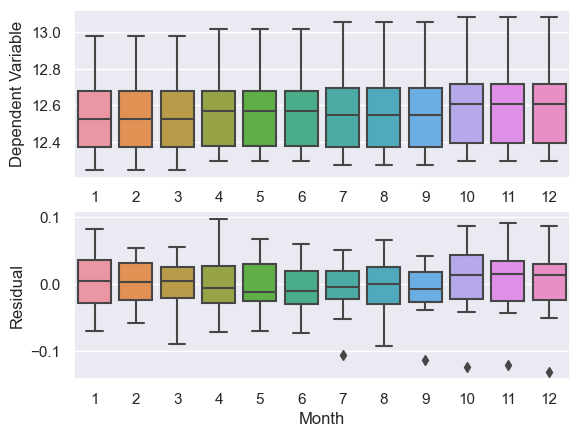

In [62]:
# Create seasonality plots - monthly
plt.figure(2)
ax1_q = plt.subplot(2, 1, 1)
sns.boxplot(data=seasonality_df, x='Month', y=dep_var.columns.values[0], ax=ax1_q)
ymin, ymax = ax1_q.get_ylim()
ax1_q.set_ylabel('Dependent Variable')

ax2_q = plt.subplot(2, 1, 2)
sns.boxplot(data=seasonality_df, x='Month', y='Residual', ax=ax2_q)
#ax2_q.set_ylim((ymin, ymax))

In [63]:
# Seasonal effects regression - quarterly
ols_quarter_y = sm.OLS(endog=seasonality_df.loc[:, dep_var.columns.values[0]],
              exog=seasonality_df.loc[:, ['Q1','Q2','Q3','Q4']], missing='drop').fit()
y_quarter_coef = ols_quarter_y.params
y_quarter_pval = ols_quarter_y.pvalues

ols_quarter_resid = sm.OLS(endog=seasonality_df.loc[:, 'Residual'],
              exog=seasonality_df.loc[:, ['Q1','Q2','Q3','Q4']], missing='drop').fit()
resid_quarter_coef = ols_quarter_resid.params
resid_quarter_pval = ols_quarter_resid.pvalues

quarter_df = pd.DataFrame([y_quarter_coef, y_quarter_pval, resid_quarter_coef, resid_quarter_pval], 
                          index=['Dependent Variable Coeffient','Dependent Variable p-Value',
                                 'Residual Coeffient','Residual p-Value']).T
quarter_df

,Dependent Variable Coeffient,Dependent Variable p-Value,Residual Coeffient,Residual p-Value
Q1,12.554714,0.0,-0.000090,0.986933
Q2,12.560965,0.0,-0.002391,0.664533
Q3,12.569219,0.0,-0.004779,0.386482
Q4,12.587305,0.0,0.007260,0.188735


In [64]:
# F-test
f_test_quarter = np.identity(len(y_quarter_coef))
f_test_quarter = f_test_quarter[1:, :]
ols_quarter_y.f_test(f_test_quarter)

<class 'statsmodels.stats.contrast.ContrastResults'>
<F test: F=179796.81130604408, p=0.0, df_denom=224, df_num=3>

In [65]:
# Seasonal effects regression - monthly
ols_month_y = sm.OLS(endog=seasonality_df.loc[:, dep_var.columns.values[0]],
              exog=seasonality_df.loc[:, ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']], missing='drop').fit()
y_month_coef = ols_month_y.params
y_month_pval = ols_month_y.pvalues

ols_month_resid = sm.OLS(endog=seasonality_df.loc[:, 'Residual'],
              exog=seasonality_df.loc[:, ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']], missing='drop').fit()
resid_month_coef = ols_month_resid.params
resid_month_pval = ols_month_resid.pvalues

month_df = pd.DataFrame([y_month_coef, y_month_pval, resid_month_coef, resid_month_pval], 
                          index=['Dependent Variable Coeffient','Dependent Variable p-Value',
                                 'Residual Coeffient','Residual p-Value']).T
month_df

,Dependent Variable Coeffient,Dependent Variable p-Value,Residual Coeffient,Residual p-Value
Jan,12.554714,3.402328e-264,0.003003,0.757028
Feb,12.554714,3.402328e-264,0.000792,0.934925
Mar,12.554714,3.402328e-264,-0.004066,0.675289
Apr,12.560965,3.056748e-264,0.001375,0.887299
May,12.560965,3.056748e-264,-0.000962,0.921031
Jun,12.560965,3.056748e-264,-0.007588,0.434584
Jul,12.569219,2.653756e-264,-0.004022,0.678576
Aug,12.569219,2.653756e-264,-0.002581,0.790293
Sep,12.569219,2.653756e-264,-0.007733,0.425839
Oct,12.587305,1.947502e-264,0.008443,0.384688


In [66]:
# Colinearality test - VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor

def colinearality_test(X):
    vif = pd.DataFrame()
    vif['VIF Factor'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif['Features'] = X.columns
    print(vif.round(2))

colinearality_test(new_x)

   VIF Factor             Features
0        1.00                const
1        4.18                  CPI
2        5.31  Nonfarm_Job_Opening
3        2.90    Credit_Card_Deliq
4        1.69       Fixed_30Y_Mtge


In [67]:
# another implementation of VIF for colinearility test based on matrix calculation
X_corr = new_x.iloc[:, 1:].corr() # remove the column for constant then calculate correlation
vifs = np.diag(np.linalg.inv(X_corr.values)) # linalg.inv: Compute the (multiplicative) inverse of a matrix.
vifs_df = pd.DataFrame(vifs, columns=['VIF'], index=new_x.columns[1:])
vifs_df

,VIF
CPI,4.177145
Nonfarm_Job_Opening,5.314796
Credit_Card_Deliq,2.903447
Fixed_30Y_Mtge,1.690765


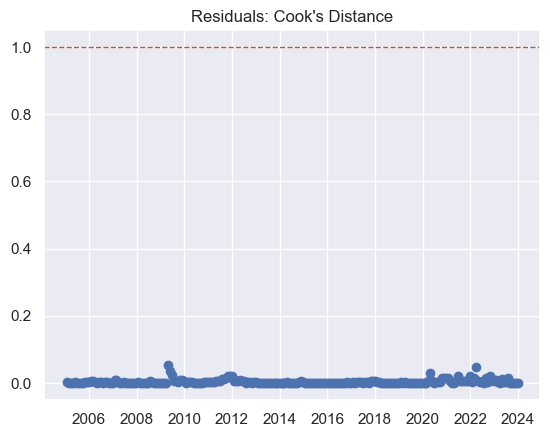

In [68]:
# Outlier influence - Cooker's Distance
# Calculate Cooker's Distance values for each observation and plot them, if an observation's Cooker's Distance value
# is above 1.0, then it may be a leverate point
from statsmodels.stats.outliers_influence import OLSInfluence
# Get values
outlier_inf = OLSInfluence(reg)
cooksd_stat, cooksd_pval = outlier_inf.cooks_distance
cooksd = pd.DataFrame(np.atleast_2d(cooksd_stat).T, columns=['Cook''s D'],
                      index=new_x.loc[~np.isnan(np.array(dep_var))].index.values)

# Check for large values and set those large points to NaN
for i, d in enumerate(cooksd['Cook''s D']):
    if d > 1000: cooksd.iloc[i] = np.nan
        
# Plot Cook's D for all values and annotate large points
fig, ax = plt.subplots()
ax.set_title("Residuals: Cook's Distance")
ax.plot(cooksd['Cook''s D'], linewidth=0, marker='o')
ax.axhline(1.0, color='r', linewidth=1, linestyle='dashed')
labels = cooksd.index.strftime('%b-%y').values
for d_i, date, label in zip(cooksd['Cook''s D'], cooksd.index.values, labels):
    if d_i > 1.0: plt.annotate(label, xy=(date, d_i))

/Users/l/opt/anaconda3/lib/python3.9/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


<Figure size 640x480 with 0 Axes>

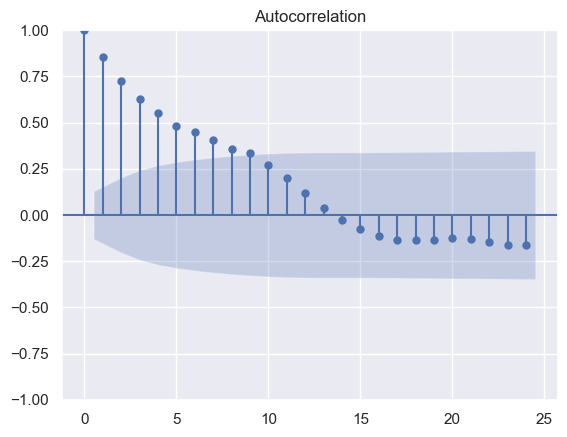

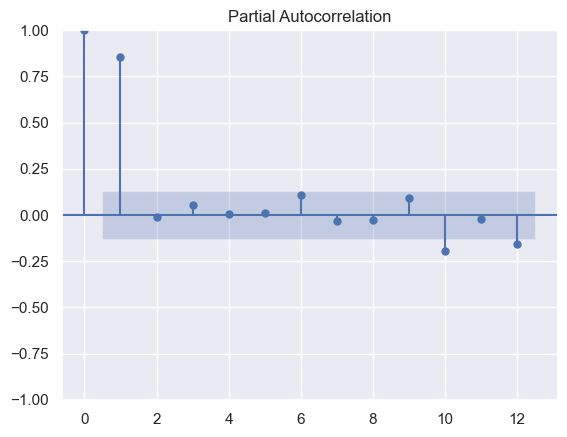

Autocorrelation durbin watson test value is 0.29


In [69]:
# autocorrelation test - ACF and PACF on different lags
import statsmodels.graphics.tsaplots as tsaplot
import statsmodels.stats.stattools as stattools

def auto_correlation(data):
    plt.figure(1)
    tsaplot.plot_acf(data)
    plt.figure(2)
    tsaplot.plot_pacf(data, lags=12)
    plt.show()
    stat = stattools.durbin_watson(data)
    print('Autocorrelation durbin watson test value is %4.2f' % stat)

resid = reg.resid
auto_correlation(resid)

In [70]:
import statsmodels.tsa.stattools as tstool
n_lags = 12
threshold = 0.05
acfs, conf_int, q_stat, p_val = tstool.acf(resid[~np.isnan(resid)], 
                                           nlags=n_lags, alpha=threshold, qstat=True)
acf_table = [np.round(acfs,4), np.round(np.squeeze(conf_int[:,0]),4), np.round(np.squeeze(conf_int[:,1]),4), 
             np.insert(np.round(q_stat,4), 0, np.nan, axis=0),
             np.insert(p_val, 0, np.nan, axis=0) ] # for q_stat and p_val: insert np.nan before index 0
# np.insert(array, index/indices before which values is inserted, values to insert, axis): 
# Insert values along the given axis before the given indices.
acf_stats = pd.DataFrame(acf_table, 
                               index=['Autocorrelation','95% C.I.: Lower','95% C.I.: Upper','Ljung-Box Q, value',
                                     'Ljung-Box Q, p-Value'])
acf_stats = acf_stats.T
acf_stats.index.name = 'Lag Order'
acf_stats

,Autocorrelation,95% C.I.: Lower,95% C.I.: Upper,"Ljung-Box Q, value","Ljung-Box Q, p-Value"
Lag Order,,,,,
0,1.0000,1.0000,1.0000,NaN,NaN
1,0.8528,0.7230,0.9826,168.0132,2.009600e-38
2,0.7245,0.5211,0.9278,289.7951,1.179759e-63
3,0.6302,0.3872,0.8732,382.3494,1.472902e-82
4,0.5498,0.2807,0.8190,453.1251,9.166959e-97
5,0.4813,0.1939,0.7687,507.6039,1.823431e-107
6,0.4488,0.1481,0.7495,555.1908,1.073426e-116
7,0.4072,0.0954,0.7189,594.5299,3.667867e-124
8,0.3577,0.0371,0.6784,625.0363,9.677012e-130


In [71]:
# stationary test - ADF
import statsmodels.tsa.stattools as tstool

def stationary_test(data, threshold=0.05):
    for m in ['c', 'ct', 'ctt']:
        p = tstool.adfuller(data, regression=m, autolag=None)[1]
        passfail = 'Stationary' if p < threshold else 'Not stationary'
        print('%-12s p-value = %4.3f %s' % (m, p, passfail) )

stationary_test(resid)

c            p-value = 0.006 Stationary
ct           p-value = 0.023 Stationary
ctt          p-value = 0.076 Not stationary


In [72]:
# Stationarity test - KPSS and ADF
import statsmodels.tsa.stattools as tstool

# KPSS test
n_lags = 12
threshold = 0.05
kpss = tstool.kpss(x=resid[~np.isnan(resid)], regression='c', nlags=n_lags)
kpss_stat, kpss_pval = kpss[0], kpss[1]
kpss_result = 'Yes' if kpss_pval > threshold else 'No'

# Augmented Dickey Fuller (ADF) test
adf = tstool.adfuller(x=resid[~np.isnan(resid)], regression='c', maxlag=n_lags)
adf_stat, adf_pval = adf[0], adf[1]
adf_result = 'Yes' if adf_pval < threshold else 'No'

stationarity_stats = pd.DataFrame(np.array([[kpss_stat, kpss_pval, kpss_result],
                                           [adf_stat, adf_pval, adf_result]]),
                               index=['KPSS', 'Augmented Dickey Fuller'], 
                                  columns=['Test Statistic', 'p-Value', 'Stationary?'])
stationarity_stats

/Users/l/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/stattools.py:2022: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  warnings.warn(


,Test Statistic,p-Value,Stationary?
KPSS,0.12815447196654642,0.1,Yes
Augmented Dickey Fuller,-4.244136445667266,0.0005542753115627516,Yes


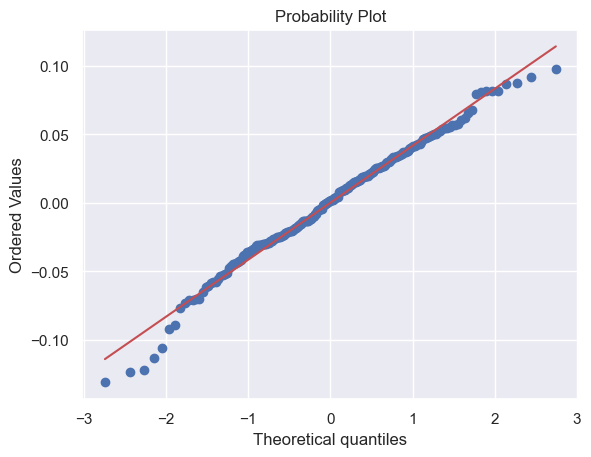

Normality Shapiro Wilk test: p = 0.05106   PASS
Normality Anderson Darling Stats is: 0.46109
AD - Significant level -  15% 0.57 PASS
AD - Significant level -  10% 0.65 PASS
AD - Significant level -   5% 0.77 PASS
AD - Significant level -   2% 0.90 PASS
AD - Significant level -   1% 1.07 PASS


In [73]:
# normality test - Shapiro Wilk, Anderson Darling
import scipy as sp

def normality_test(data, threshold=0.05):
    sp.stats.probplot(data, dist='norm', plot=plt)
    plt.show()
    stat, p = sp.stats.shapiro(data)
    passfail = 'PASS' if p > threshold else 'FAIL'
    print('Normality Shapiro Wilk test: p = %4.5f' % p, ' ', passfail)
    stat2, cv, sv = sp.stats.anderson(data, 'norm')
    print('Normality Anderson Darling Stats is: %4.5f' % stat2)
    for i in range(len(sv)):
        passfail2 = 'PASS' if stat2 < cv[i] else 'FAIL'
        print('AD - Significant level - %3.0f%% %4.2f %s' % (sv[i], cv[i], passfail2))

normality_test(resid)

/Users/l/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/l/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


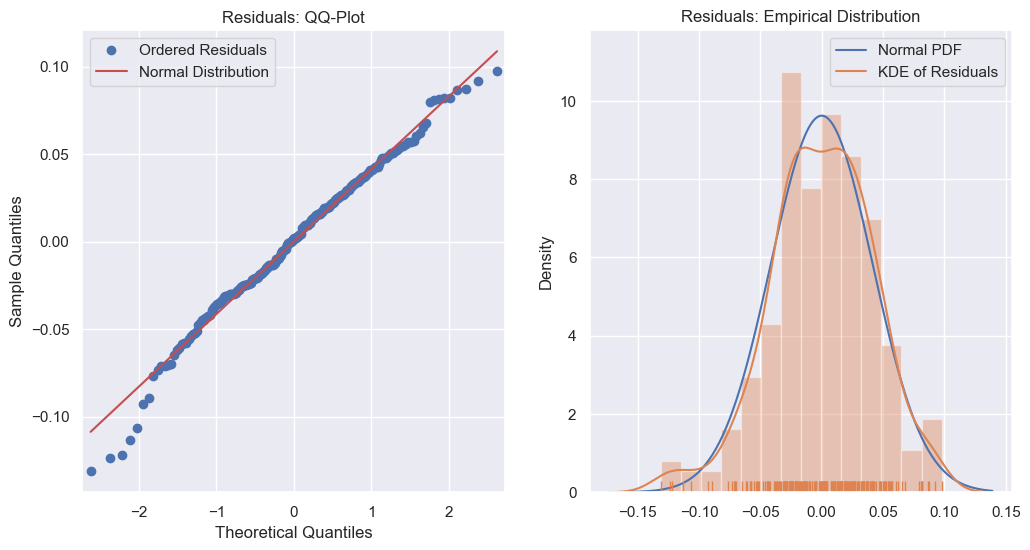

In [74]:
# normality test - QQ Plot, Kernel Density Estimate of residuals, Jarque Bera, Anderson Darling, Kolmogorov Smirnov
from statsmodels.graphics.gofplots import qqplot
from scipy.stats import norm
from statsmodels.stats.stattools import jarque_bera
from statsmodels.stats.diagnostic import normal_ad, kstest_normal

# QQ Plot
fig, (ax_qq, ax_kde) = plt.subplots(nrows=1, ncols=2, figsize=(12,6))
qqplot(resid, line='s', ax=ax_qq)
ax_qq.set_title('Residuals: QQ-Plot')
ax_qq.legend(['Ordered Residuals', 'Normal Distribution'], loc='upper left')

# Histogram, Kernel Density Estimate of residuals plotted with a normal pdf for the residuals mean and std. dev
x_min = float(np.min(resid) - np.std(resid))
x_max = float(np.max(resid) + np.std(resid))
x = np.linspace(x_min, x_max, int(reg.nobs))
y = norm.pdf(x, loc=np.mean(resid), scale=np.std(resid))
ax_kde.plot(x, y)
sns.distplot(resid, rug=True, ax=ax_kde)
ax_kde.set_title('Residuals: Empirical Distribution')
ax_kde.legend(['Normal PDF', 'KDE of Residuals'], loc='upper right')

In [75]:
# normality test - QQ Plot, Kernel Density Estimate of residuals, Jarque Bera, Anderson Darling, Kolmogorov Smirnov
# Jarque Bera test
jb_stat, jb_pval, _, _ = jarque_bera(resids=resid)
jb_result = 'Yes' if jb_pval < threshold else 'No'

# Anderson Darling test
ad_stat, ad_pval = normal_ad(x=resid)
ad_result = 'Yes' if ad_pval < threshold else 'No'

# Kolmogorov Smirnov test
ks_stat, ks_pval = kstest_normal(x=resid, dist='norm', pvalmethod='approx')
ks_result = 'Yes' if ks_pval < threshold else 'No'

normality_stats = pd.DataFrame(np.array([[jb_stat, jb_pval, jb_result],
                                        [ad_stat, ad_pval, ad_result],
                                        [ad_stat, ad_pval, ad_result]]),
                               index=['Jarque Bera', 'Anderson Darling', 'Kolmogorov Smirnov'], 
                                  columns=['Test Statistic', 'p-Value', 'Reject Normality?'])
normality_stats

,Test Statistic,p-Value,Reject Normality?
Jarque Bera,5.629074561755379,0.05993244421304841,No
Anderson Darling,0.46109487389983883,0.257365197422155,No
Kolmogorov Smirnov,0.46109487389983883,0.257365197422155,No


In [76]:
# Heteroscedasticity test - Breush Pagan
import statsmodels.stats as stats

def heteroscedasticity_test(data, X, threshold=0.05):
    p = stats.diagnostic.het_breuschpagan(data, X)[1]
    passfail = 'Heteroschedasticity Present' if p < threshold else ' No Heteroschedasticity Present'
    print('Heteroscedasticity Breush Pagan test: p = %4.5f %s' % (p, passfail) )

heteroscedasticity_test(resid, new_x)

Heteroscedasticity Breush Pagan test: p = 0.00220 Heteroschedasticity Present


In [77]:
# Heteroscedasticity test - Breush Pagan, White's test, ARCH test
# Breush Pagan test
bp_lm_stat, bp_lm_pval, bp_f_stat, bp_f_pval = stats.diagnostic.het_breuschpagan(resid, new_x)
# White's test
white_lm_stat, white_lm_pval, white_f_stat, white_f_pval = stats.diagnostic.het_white(resid, new_x)
# ARCH test
arch_lm_stat, arch_lm_pval, arch_f_stat, arch_f_pval = None, 1.0, None, 1.0
rejected_lags = []
arch_maxlag = 6
threshold = 0.05
for lag in range(arch_maxlag):
    arch_lm_stat_tmp, arch_lm_pval_tmp, arch_f_stat_tmp, arch_f_pval_tmp = stats.diagnostic.het_arch(resid, maxlag=lag)
    if arch_lm_pval_tmp < arch_lm_pval:
        arch_lm_stat, arch_lm_pval, arch_f_stat, arch_f_pval = arch_lm_stat_tmp, arch_lm_pval_tmp, arch_f_stat_tmp, arch_f_pval_tmp
    if arch_lm_pval < threshold:
        rejected_lags.append(lag)
bp_result = 'Yes' if bp_lm_pval < threshold else 'No'
white_result = 'Yes' if white_lm_pval < threshold else 'No'
arch_result = 'Yes' if arch_lm_pval < threshold else 'No'
hat_stats = pd.DataFrame([[bp_lm_stat, bp_lm_pval, bp_result, 'N/A'],
                         [white_lm_stat, white_lm_pval, white_result, 'N/A'],
                         [arch_lm_stat, arch_lm_pval, arch_result, rejected_lags]], 
                               index=['Breush Pagan test','White''s test','ARCH test'],
                              columns=['Statistic','p-Value','Heteroskedasticity Present?','ARCH Lag Orders'])
hat_stats

/var/folders/qw/0f3qsf1n4k3_rbcq1_w64qm00000gn/T/ipykernel_46694/1907168752.py:12: FutureWarning: the 'maxlag'' keyword is deprecated, use 'nlags' instead.
  arch_lm_stat_tmp, arch_lm_pval_tmp, arch_f_stat_tmp, arch_f_pval_tmp = stats.diagnostic.het_arch(resid, maxlag=lag)


,Statistic,p-Value,Heteroskedasticity Present?,ARCH Lag Orders
Breush Pagan test,16.714120,2.196415e-03,Yes,N/A
Whites test,44.947164,4.160686e-05,Yes,N/A
ARCH test,126.497135,2.393470e-29,Yes,"[1, 2, 3, 4, 5]"


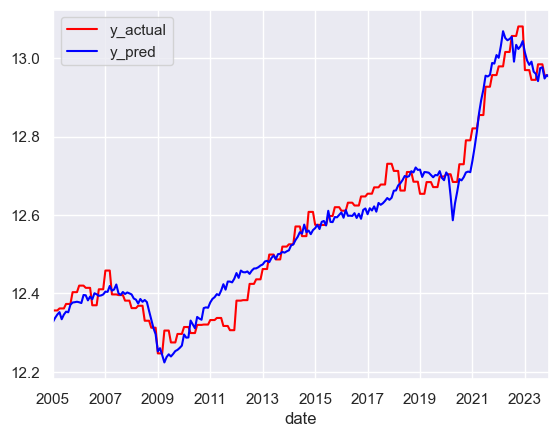

In [78]:
# Insample plot
def insample_plot(X, y, model):
    df1 = pd.DataFrame(y)
    df2 = pd.DataFrame(model.predict(X), index=df1.index)
    df = df1.join(df2)
    df.columns = ['y_actual', 'y_pred']
    df.plot(color=['red', 'blue'])
    
insample_plot(new_x, dep_var, reg)

                            OLS Regression Results                            
Dep. Variable:     Median_House_Price   R-squared:                       0.929
Model:                            OLS   Adj. R-squared:                  0.928
Method:                 Least Squares   F-statistic:                     574.3
Date:                Fri, 17 May 2024   Prob (F-statistic):           1.93e-99
Time:                        23:32:56   Log-Likelihood:                 331.66
No. Observations:                 180   AIC:                            -653.3
Df Residuals:                     175   BIC:                            -637.4
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  12.5679    

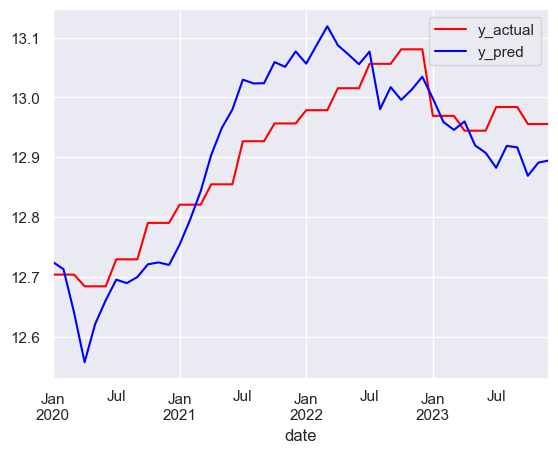

In [79]:
# Outsample plot
def outsample_plot(X, y, test_range):
    start, end = test_range[0], test_range[1]
    X_test = X[start:end]
    y_test = y[start:end]
    X_train = X.drop(X_test.index)
    y_train = y.drop(y_test.index)
    reg_train = sm.OLS(y_train, X_train).fit()
    print(reg_train.summary())
    df1 = pd.DataFrame(y_test)
    df2 = pd.DataFrame(reg_train.predict(X_test), index=df1.index)
    df = df1.join(df2)
    df.columns = ['y_actual', 'y_pred']
    df.plot(color=['red', 'blue'])
    
outsample_plot(new_x, dep_var, ['1/31/2020', '12/31/2023'])

In [124]:
# Leave-One-Year-Out Cross Validation
n_obs = int(reg.nobs)
#loyo_pred = np.empty_like(dep_var)
loyo_pred = pd.Series()
# numpy.empty_like(prototype, dtype=None, order='K', subok=True, shape=None)
# Return a new array with the same shape and type as a given array.

for k in np.arange(12, n_obs+12, 12): # (start, stop, step)
    loyo_ind = np.arange(k-12, k)
    loyo_y = dep_var.drop(dep_var.index[list(loyo_ind)], inplace=False)
    loyo_x = new_x.drop(new_x.index[list(loyo_ind)], inplace=False)
    loyo_reg = sm.OLS(endog=loyo_y, exog=loyo_x, missing='drop').fit()
    loyo_pred = loyo_pred.append(loyo_reg.predict(new_x.iloc[list(loyo_ind),:]))

mod_n_obs = np.mod(n_obs, 12) # if there are any remainder after dividing by 12
if mod_n_obs:
    loyo_ind = np.arange(k, k+mod_n_obs)
    loyo_y = dep_var.drop(dep_var.index[list(loyo_ind)], inplace=False)
    loyo_x = new_x.drop(new_x.index[list(loyo_ind)], inplace=False)
    loyo_reg = sm.OLS(endog=loyo_y, exog=loyo_x, missing='drop').fit()
    loyo_pred = loyo_pred.append(loyo_reg.predict(new_x.iloc[list(loyo_ind),:]))

/var/folders/qw/0f3qsf1n4k3_rbcq1_w64qm00000gn/T/ipykernel_46694/4146084480.py:4: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  loyo_pred = pd.Series()
/var/folders/qw/0f3qsf1n4k3_rbcq1_w64qm00000gn/T/ipykernel_46694/4146084480.py:13: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  loyo_pred = loyo_pred.append(loyo_reg.predict(new_x.iloc[list(loyo_ind),:]))
/var/folders/qw/0f3qsf1n4k3_rbcq1_w64qm00000gn/T/ipykernel_46694/4146084480.py:13: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  loyo_pred = loyo_pred.append(loyo_reg.predict(new_x.iloc[list(loyo_ind),:]))
/var/folders/qw/0f3qsf1n4k3_rbcq1_w64qm00000gn/T/ipykernel_46694/4146084480.py:13: FutureWarning: The series.append method is deprecated an

In [143]:
# Calculate RMSE and MAE results
champ_insample = reg.predict(new_x)
delta_champ_loyocv = champ_insample - loyo_pred

rmse_champ = np.sqrt(reg.mse_resid)
rmse_loyocv = np.sqrt(np.sum(np.square(dep_var.iloc[:,0].to_list() - loyo_pred)) / reg.df_resid)
rmse_ratio = rmse_loyocv / rmse_champ

mae_champ = np.sum(np.abs(reg.resid)) / reg.df_resid
mae_loyocv = np.sum(np.abs(dep_var.iloc[:,0].to_list() - loyo_pred)) / (n_obs - new_x.shape[1]) 
# reg.df_resid == n_obs - new_x.shape[1] == 223
mae_ratio = mae_loyocv / mae_champ

,Actuals,Champion,LOYO-CV,Difference
2005-01-31,12.356646,12.327581,12.318802,0.008779
2005-02-28,12.356646,12.337757,12.328922,0.008835
2005-03-31,12.356646,12.346158,12.336855,0.009303
2005-04-30,12.361794,12.352361,12.343394,0.008968
2005-05-31,12.361794,12.334298,12.325856,0.008442
...,...,...,...,...
2023-08-31,12.984020,12.974363,12.987332,-0.012969
2023-09-30,12.984020,12.976366,12.989779,-0.013412
2023-10-31,12.955600,12.947844,12.962634,-0.014789
2023-11-30,12.955600,12.956625,12.970220,-0.013595


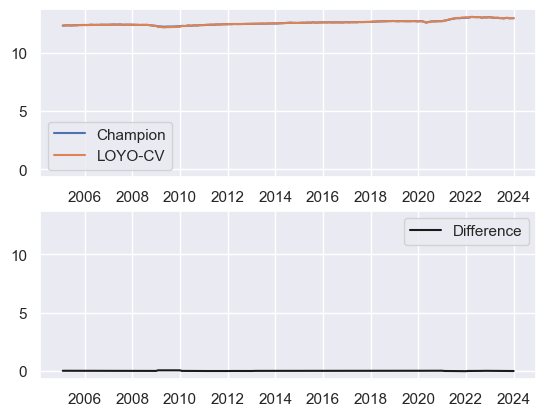

In [169]:
# Plot data, create LOYO-CV stats table and data table
fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, sharey=True)
ax1.plot(new_x.index.values, champ_insample)
ax1.plot(new_x.index.values, loyo_pred)
ax1.legend(['Champion', 'LOYO-CV'])

ax2.plot(new_x.index.values, delta_champ_loyocv, color='k')
ax2.legend(['Difference'])

loyocv_stats_df = pd.DataFrame([[rmse_champ, rmse_loyocv, rmse_ratio],
                                [mae_champ, mae_loyocv, mae_ratio]], 
                               index=['RMSE','MAE'], columns=['Champion', 'LOYO-CV', 'Ratio']).T
loyocv_data_df = pd.concat([dep_var.iloc[:,0],champ_insample,loyo_pred,delta_champ_loyocv ], axis=1)
loyocv_data_df.columns=['Actuals','Champion', 'LOYO-CV', 'Difference']
loyocv_data_df